In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [5]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [6]:
bf_train = pd.read_csv('train.csv')

In [7]:
bf_train.tail(50)

User_ID Product_ID Gender    Age  Occupation City_Category  \
550018  1005961  P00372445      F  46-50           0             A   
550019  1005962  P00372445      M  36-45           7             C   
550020  1005964  P00370293      M  18-25           5             B   
550021  1005965  P00370293      M  26-35          17             C   
550022  1005971  P00370293      M  36-45           7             C   
550023  1005972  P00371644      F  26-35          20             B   
550024  1005973  P00370293      M   0-17          10             C   
550025  1005974  P00375436      F  26-35           1             C   
550026  1005975  P00370853      M  26-35          14             A   
550027  1005976  P00371644      F  26-35           1             C   
550028  1005978  P00371644      M  36-45           1             B   
550029  1005979  P00370853      M  26-35           1             B   
550030  1005980  P00372445      M    55+           1             C   
550031  1005982  P00372445      M  36-45           1             B   
550032  1005985  P00375436      F  18-25           4             C   
550033  1005987  P00370293      M  26-35          16             B   
550034  1005988  P00372445      M  26-35          15             B   
550035  1005989  P00370853      F   0-17          10             C   
550036  1005990  P00370853      F  26-35          20             B   
550037  1005993  P00370293      F  51-55          20             C   
550038  1005995  P00375436      F  36-45           1             C   
550039  1005996  P00371644      F  26-35           0             B   
550040  1005997  P00370853      F  26-35           7             A   
550041  1006000  P00371644      M  46-50          17             B   
550042  1006002  P00371644      M  51-55           0             C   
550043  1006003  P00370293      F  46-50          17             C   
550044  1006004  P00370853      F  26-35          15             C   
550045  1006005  P00371644      F  26-35           5             C   
550046  1006006  P00375436      F   0-17           0             C   
550047  1006009  P00372445      F  26-35          12             C   
550048  1006010  P00371644      M  36-45           0             C   
550049  1006011  P00375436      M  36-45          15             C   
550050  1006012  P00371644      M  36-45          15             C   
550051  1006013  P00375436      F  26-35          20             C   
550052  1006016  P00375436      M  46-50           1             B   
550053  1006017  P00371644      F  36-45           7             B   
550054  1006018  P00370293      M  36-45           1             C   
550055  1006019  P00372445      M  26-35           0             A   
550056  1006022  P00375436      M  26-35          17             C   
550057  1006023  P00370853      M  26-35           0             C   
550058  1006024  P00372445      M  26-35          12             A   
550059  1006025  P00370853      F  26-35           1             B   
550060  1006026  P00371644      M  36-45           6             C   
550061  1006029  P00372445      F  26-35           1             C   
550062  1006032  P00372445      M  46-50           7             A   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
550018                          3               0                  20   
550019                          2               1                  20   
550020                          1               0                  19   
550021                          1               0                  19   
550022                          1               0                  19   

In [5]:
bf_train.shape

(550068, 12)

In [6]:
bf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
#Null Values is present for the column - Product_Category_2,Product_Category_3
bf_train.apply(lambda x:len(x.unique()))

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18105
dtype: int64

In [8]:
cat_cols=[x for x in bf_train.dtypes.index if bf_train.dtypes[x]=='object']

cat_cols=[x for x in cat_cols if x not in ['Item_Identifier']]

for col in cat_cols:
    print('\nFrequency of Categories for variable %s'%(col))
    print(bf_train[col].value_counts())


Frequency of Categories for variable Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00059442    1406
P00145042    1406
P00237542    1394
P00255842    1383
P00117942    1364
P00110942    1360
P00010742    1350
P00220442    1282
P00110842    1281
P00117442    1260
P00051442    1249
P00102642    1246
P00278642    1226
P00242742    1215
P00034742    1212
P00148642    1204
P00080342    1203
P00031042    1200
P00028842    1197
P00251242    1187
P00114942    1178
P00270942    1152
P00000142    1152
P00112542    1131
P00044442    1111
P00334242    1093
P00111142    1015
P00277642     989
P00052842     982
P00116842     979
P00295942     972
P00005042     969
P00003442     968
P00086442     966
P00258742     964
P00085942     963
P00110542     958
P00216342     943
P00128942     936
P00073842     936
P00113242     933
P00112442     923
P00105142     917
P0097242      912
P00147942     9

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64


In [9]:
cat_cols=[x for x in bf_train.dtypes.index if bf_train.dtypes[x]=='float']

cat_cols=[x for x in cat_cols if x not in ['Item_Identifier']]

for col in cat_cols:
    print('\nFrequency of Categories for variable %s'%(col))
    print(bf_train[col].value_counts())


Frequency of Categories for variable Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

Frequency of Categories for variable Product_Category_3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: Product_Category_3, dtype: int64


In [10]:
bf_train.describe().T# only for int columns

count          mean          std        min        25%  \
User_ID             550068.0  1.003029e+06  1727.591586  1000001.0  1001516.0   
Occupation          550068.0  8.076707e+00     6.522660        0.0        2.0   
Marital_Status      550068.0  4.096530e-01     0.491770        0.0        0.0   
Product_Category_1  550068.0  5.404270e+00     3.936211        1.0        1.0   
Product_Category_2  376430.0  9.842329e+00     5.086590        2.0        5.0   
Product_Category_3  166821.0  1.266824e+01     4.125338        3.0        9.0   
Purchase            550068.0  9.263969e+03  5023.065394       12.0     5823.0   

                          50%        75%        max  
User_ID             1003077.0  1004478.0  1006040.0  
Occupation                7.0       14.0       20.0  
Marital_Status            0.0        1.0        1.0  
Product_Category_1        5.0        8.0       20.0  
Product_Category_2        9.0       15.0       18.0  
Product_Category_3       14.0       16.0       18.0  
Purchase               8047.0    12054.0    23961.0

In [11]:
purchase_sum=[]

#if file is present than run the file and not needded to run load the data every time as it is time consuming

import os
if not os.path.isfile("/Users/rk/Desktop/Analytics Vidhya/BlackFridaySales/Purchase_history.csv"):

    
    for i in set(bf_train['User_ID']):
        
        cust_purchase=[]
        
        user_id=bf_train.loc[bf_train.User_ID==i,"User_ID"].mode()
        gender=bf_train.loc[bf_train.User_ID==i,"Gender"].mode()
        age=bf_train.loc[bf_train.User_ID==i,"Age"].mode()
        occ=bf_train.loc[bf_train.User_ID==i,"Occupation"].mode()
        city=bf_train.loc[bf_train.User_ID==i,"City_Category"].mode()
        year=bf_train.loc[bf_train.User_ID==i,"Stay_In_Current_City_Years"].mode()
        mar=bf_train.loc[bf_train.User_ID==i,"Marital_Status"].mode()
        p_1=bf_train.loc[bf_train.User_ID==i,"Product_Category_1"].mode()
        p_2=bf_train.loc[bf_train.User_ID==i,"Product_Category_2"].mode()
        #p_3=bf_train.loc[bf_train.User_ID==i,"Product_Category_3"].mode()
        pur=bf_train.loc[bf_train.User_ID==i,"Purchase"].sum()
        
        cust_purchase.append(user_id[0])
        cust_purchase.append(gender[0])
        cust_purchase.append(age[0])
        cust_purchase.append(occ[0])
        cust_purchase.append(city[0])
        cust_purchase.append(year[0])
        cust_purchase.append(mar[0])
        cust_purchase.append(p_1[0])
        cust_purchase.append(p_2[0])
        #cust_purchase.append(p_3[0])
        cust_purchase.append(pur)
        
        purchase_sum.append(cust_purchase)
        
else:
    print("Fetching Summary Files.........")
    main_df=pd.read_csv("/Users/rk/Desktop/Analytics Vidhya/BlackFridaySales/Purchase_history.csv")

In [12]:
purchase_sum

[[1000001, 'F', '0-17', 10, 'A', '2', 0, 3, 4.0, 334093],
 [1000002, 'M', '55+', 16, 'C', '4+', 0, 1, 8.0, 810472],
 [1000003, 'M', '26-35', 15, 'A', '3', 0, 1, 2.0, 341635],
 [1000004, 'M', '46-50', 7, 'B', '2', 1, 1, 2.0, 206468],
 [1000005, 'M', '26-35', 20, 'A', '1', 1, 8, 8.0, 821001],
 [1000006, 'F', '51-55', 9, 'A', '1', 0, 5, 14.0, 379930],
 [1000007, 'M', '36-45', 1, 'B', '1', 1, 1, 15.0, 234668],
 [1000008, 'M', '26-35', 12, 'C', '4+', 1, 8, 14.0, 796593],
 [1000009, 'M', '26-35', 17, 'C', '0', 0, 8, 16.0, 594099],
 [1000010, 'F', '36-45', 1, 'B', '4+', 1, 5, 4.0, 2169510],
 [1000011, 'F', '26-35', 1, 'C', '1', 0, 5, 8.0, 557023],
 [1000012, 'M', '26-35', 12, 'C', '2', 0, 5, 6.0, 120801],
 [1000013, 'M', '46-50', 1, 'C', '3', 1, 1, 2.0, 713927],
 [1000014, 'M', '36-45', 0, 'C', '0', 0, 1, 8.0, 127629],
 [1000015, 'M', '26-35', 7, 'A', '1', 0, 1, 8.0, 1047728],
 [1000016, 'F', '36-45', 0, 'C', '0', 1, 5, 14.0, 150490],
 [1000017, 'M', '51-55', 1, 'C', '0', 0, 1, 15.0, 1425995]

In [13]:
main_df = pd.DataFrame(purchase_sum,columns=['user_id','gender','age','occ','city','year','mar','p_1','p_2','purchase'])
main_df

user_id gender    age  occ city year  mar  p_1   p_2  purchase
0     1000001      F   0-17   10    A    2    0    3   4.0    334093
1     1000002      M    55+   16    C   4+    0    1   8.0    810472
2     1000003      M  26-35   15    A    3    0    1   2.0    341635
3     1000004      M  46-50    7    B    2    1    1   2.0    206468
4     1000005      M  26-35   20    A    1    1    8   8.0    821001
5     1000006      F  51-55    9    A    1    0    5  14.0    379930
6     1000007      M  36-45    1    B    1    1    1  15.0    234668
7     1000008      M  26-35   12    C   4+    1    8  14.0    796593
8     1000009      M  26-35   17    C    0    0    8  16.0    594099
9     1000010      F  36-45    1    B   4+    1    5   4.0   2169510
10    1000011      F  26-35    1    C    1    0    5   8.0    557023
11    1000012      M  26-35   12    C    2    0    5   6.0    120801
12    1000013      M  46-50    1    C    3    1    1   2.0    713927
13    1000014      M  36-45    0    C    0    0    1   8.0    127629
14    1000015      M  26-35    7    A    1    0    1   8.0   1047728
15    1000016      F  36-45    0    C    0    1    5  14.0    150490
16    1000017      M  51-55    1    C    0    0    1  15.0   1425995
17    1000018      F  18-25    3    B    3    0    1   2.0   1979047
18    1000019      M   0-17   10    A    3    0    1   2.0   1458069
19    1000020      M  26-35   14    A    0    0    1  15.0    185747
20    1000021      M  18-25   16    B    0    0    3   4.0    127099
21    1000022      M  18-25   15    A   4+    0    5   2.0   1279914
22    1000023      M  36-45    0    B    3    1    1  15.0   1670998
23    1000024      F  26-35    7    A    3    1    5   8.0    720899
24    1000025      M  18-25    4    C   4+    0    1   2.0    534706
25    1000026      M  26-35    7    B    2    1    5  14.0   1606174
26    1000027      M  26-35   11    C    1    1    5  14.0    448934
27    1000028      F  26-35    1    C    2    1    5  14.0    516560
28    1000029      M  36-45    7    C    1    0    1   2.0    696201
29    1000030      F  36-45    7    C    3    0    8   8.0    261584
30    1000031      M    55+    7    C    2    0    5   8.0    496154
31    1000032      F  26-35    0    C    3    1    8  16.0    229049
32    1000033      M  46-50    3    A    1    1    8  16.0   1940418
33    1000034      F  18-25    0    A    0    0    5  14.0    807983
34    1000035      M  46-50    1    C   4+    1    5  14.0    821303
35    1000036      M  26-35    3    B    0    0    5   8.0   2316570
36    1000037      F  26-35    9    C    1    0    5  14.0    248370
37    1000039      M  18-25    4    B    2    0    5   8.0    382339
38    1000041      F  18-25    4    C    3    0    1   2.0    146840
39    1000042      M  26-35    8    C    0    1    1   2.0   1483035
40    1000043      M  26-35   12    A    0    0    5   8.0    137916
41    1000044      M  46-50   17    B    3    1    1   2.0   1180380
42    1000045      F  46-50   16    A    1    1    5  14.0    928494
43    1000046      M  18-25   19    C   4+    0   11  16.0    138729
44    1000047      M  18-25    4    C   4+    1    8  14.0    131303
45    1000048      M  26-35    4    B    3    1    1  14.0   2788504
46    1000049      M  18-25   12    C   4+    1    1   4.0    732364
47    1000050      F  26-35    2    A    1    1    5   2.0    198810
48    1000051      F   0-17   10    C    2    0    5   8.0    200772
49    1000052      M  18-25    4    C    0    0    1   2.0    523039
50    1000053      M  26-35    0    B    1    0    8   8.0   4270371
51    1000054      M  51-55    1    C   4+    1    5   5.0    187451
52    1000055      F  36-45   12    B    1    0    8   4.0    134320
53    1000056      M  36-45   20    C    0    1    8  16.0    383101
54    1000057      M  18-25   19    C    2    0    5   8.0    312584
55    1000058      M  26-35    2    B    3    0    1  15.0   2896836
56    1000059      F  51-55    1    B   4+    1    8  14.0    980118
57  

In [14]:
main_df.shape

(5891, 10)

In [15]:
main_df.isnull().sum()

user_id     0
gender      0
age         0
occ         0
city        0
year        0
mar         0
p_1         0
p_2         0
purchase    0
dtype: int64

In [16]:
percent_missing = main_df.isnull().sum() * 100 / len(main_df)

In [17]:
percent_missing

user_id     0.0
gender      0.0
age         0.0
occ         0.0
city        0.0
year        0.0
mar         0.0
p_1         0.0
p_2         0.0
purchase    0.0
dtype: float64

In [18]:
main_df.apply(lambda x:len(x.unique()))

user_id     5891
gender         2
age            7
occ           21
city           3
year           5
mar            2
p_1           15
p_2           17
purchase    5876
dtype: int64

In [19]:
main_df.dtypes

user_id       int64
gender       object
age          object
occ           int64
city         object
year         object
mar           int64
p_1           int64
p_2         float64
purchase      int64
dtype: object

In [20]:
main_df.dtypes.index

Index(['user_id', 'gender', 'age', 'occ', 'city', 'year', 'mar', 'p_1', 'p_2',
       'purchase'],
      dtype='object')

In [21]:
bf_train.head(50)

User_ID Product_ID Gender    Age  Occupation City_Category  \
0   1000001  P00069042      F   0-17          10             A   
1   1000001  P00248942      F   0-17          10             A   
2   1000001  P00087842      F   0-17          10             A   
3   1000001  P00085442      F   0-17          10             A   
4   1000002  P00285442      M    55+          16             C   
5   1000003  P00193542      M  26-35          15             A   
6   1000004  P00184942      M  46-50           7             B   
7   1000004  P00346142      M  46-50           7             B   
8   1000004   P0097242      M  46-50           7             B   
9   1000005  P00274942      M  26-35          20             A   
10  1000005  P00251242      M  26-35          20             A   
11  1000005  P00014542      M  26-35          20             A   
12  1000005  P00031342      M  26-35          20             A   
13  1000005  P00145042      M  26-35          20             A   
14  1000006  P00231342      F  51-55           9             A   
15  1000006  P00190242      F  51-55           9             A   
16  1000006   P0096642      F  51-55           9             A   
17  1000006  P00058442      F  51-55           9             A   
18  1000007  P00036842      M  36-45           1             B   
19  1000008  P00249542      M  26-35          12             C   
20  1000008  P00220442      M  26-35          12             C   
21  1000008  P00156442      M  26-35          12             C   
22  1000008  P00213742      M  26-35          12             C   
23  1000008  P00214442      M  26-35          12             C   
24  1000008  P00303442      M  26-35          12             C   
25  1000009  P00135742      M  26-35          17             C   
26  1000009  P00039942      M  26-35          17             C   
27  1000009  P00161442      M  26-35          17             C   
28  1000009  P00078742      M  26-35          17             C   
29  1000010  P00085942      F  36-45           1             B   
30  1000010  P00118742      F  36-45           1             B   
31  1000010  P00297942      F  36-45           1             B   
32  1000010  P00266842      F  36-45           1             B   
33  1000010  P00058342      F  36-45           1             B   
34  1000010  P00032442      F  36-45           1             B   
35  1000010  P00105942      F  36-45           1             B   
36  1000010  P00182642      F  36-45           1             B   
37  1000010  P00186942      F  36-45           1             B   
38  1000010  P00155442      F  36-45           1             B   
39  1000010  P00221342      F  36-45           1             B   
40  1000010  P00087242      F  36-45           1             B   
41  1000010  P00111142      F  36-45           1             B   
42  1000010  P00259342      F  36-45           1             B   
43  1000010   P0094542      F  36-45           1             B   
44  1000010  P00148642      F  36-45           1             B   
45  1000010  P00312142      F  36-45           1             B   
46  1000010  P00113242      F  36-45           1             B   
47  1000011  P00192642      F  26-35           1             C   
48  1000011  P00110842      F  26-35           1             C   
49  1000011  P00189642      F  26-35           1             C   

   Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                           2               0                   3   
1                           2               0                   1   
2                           2               0                  12   
3                           2               0                  12   
4                          4+               0                   8   
5                           3               0                   1   
6                           2               1                   1   
7                           2               1                   1   
8               

In [22]:
bf_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [23]:
percent_missing = bf_train.isnull().sum() * 100 / len(bf_train)

In [24]:
percent_missing

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

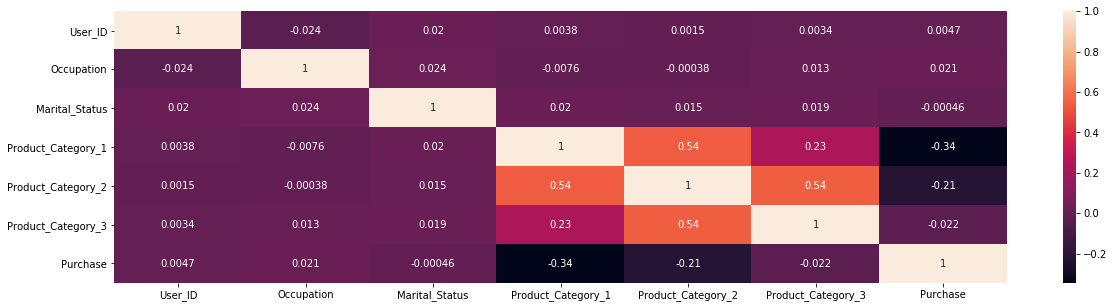

In [25]:
plt.figure(figsize=(20,5))
sns.heatmap(bf_train.corr(),annot=True)

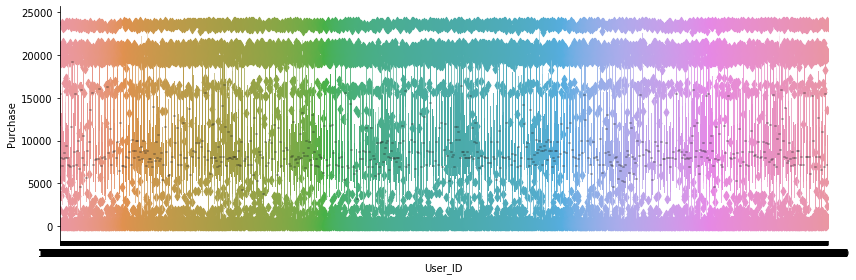

In [26]:

# UserID vs Purchase

sns.catplot(y ="Purchase", x = "User_ID", data = bf_train.sort_values("Purchase", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

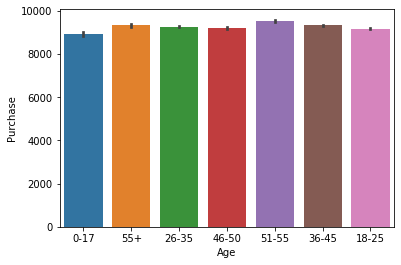

In [27]:
sns.barplot(x='Age',y = 'Purchase',data = bf_train )

In [28]:
bf_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

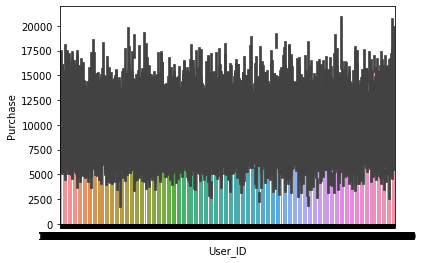

In [29]:
sns.barplot(x='User_ID',y = 'Purchase',data = bf_train )

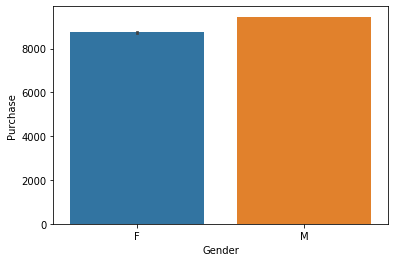

In [30]:
sns.barplot(x='Gender',y = 'Purchase',data = bf_train )

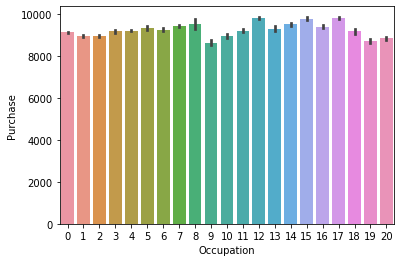

In [31]:
sns.barplot(x='Occupation',y = 'Purchase',data = bf_train )

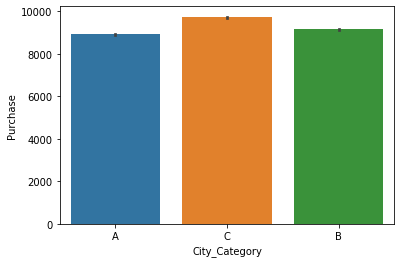

In [32]:
sns.barplot(x='City_Category',y = 'Purchase',data = bf_train )

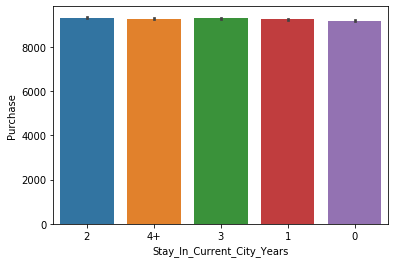

In [33]:
sns.barplot(x='Stay_In_Current_City_Years',y = 'Purchase',data = bf_train )

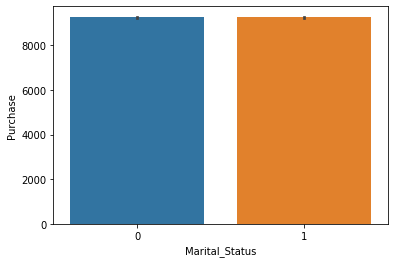

In [34]:
sns.barplot(x='Marital_Status',y = 'Purchase',data = bf_train )

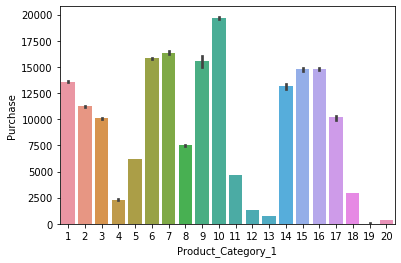

In [35]:
sns.barplot(x='Product_Category_1',y = 'Purchase',data = bf_train )

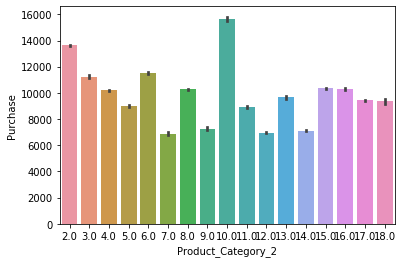

In [36]:
sns.barplot(x='Product_Category_2',y = 'Purchase',data = bf_train )

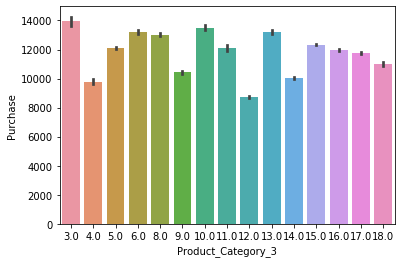

In [37]:
sns.barplot(x='Product_Category_3',y = 'Purchase',data = bf_train )

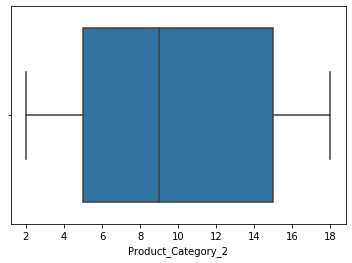

In [38]:
sns.boxplot(bf_train['Product_Category_2'])

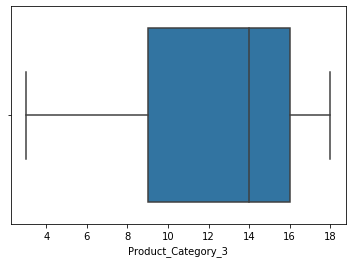

In [39]:
sns.boxplot(bf_train['Product_Category_3'])

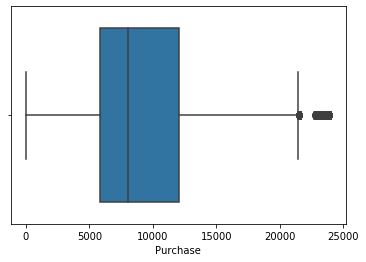

In [40]:
sns.boxplot(bf_train['Purchase'])

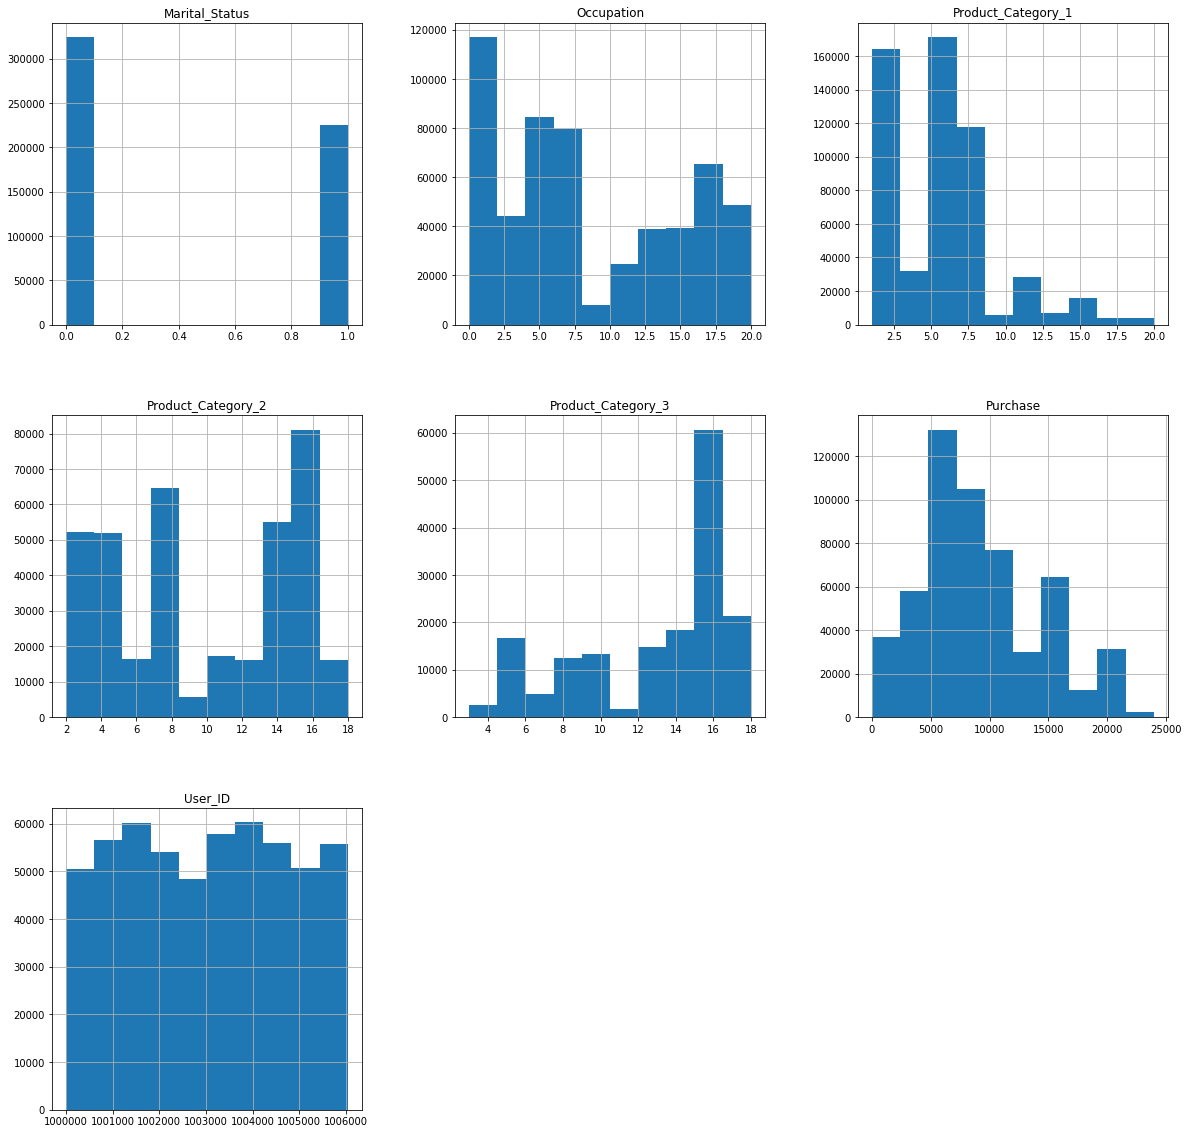

In [41]:
p = bf_train.hist(figsize = (20,20))

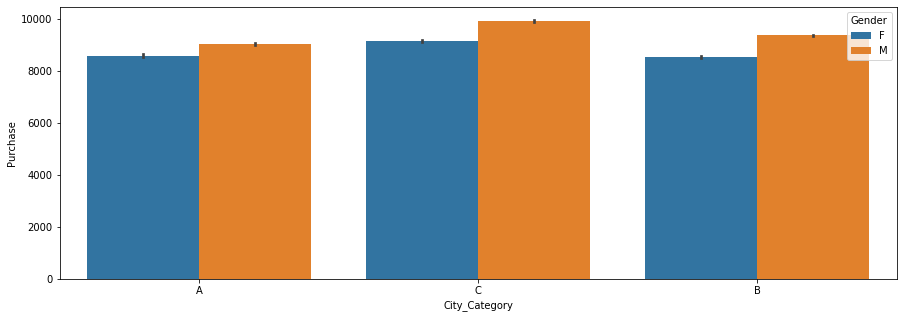

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(x='City_Category',y='Purchase',hue = 'Gender',data = bf_train)
plt.show()

In [12]:
bf_test = pd.read_csv('test.csv')

In [13]:
bf_test.shape
bf_test.info()
bf_test.describe()
bf_test.head()
bf_test.apply(lambda x:len(x.unique()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


User_ID                       5891
Product_ID                    3491
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1              18
Product_Category_2              18
Product_Category_3              16
dtype: int64

In [50]:
percent_test_missing = bf_test.isnull().sum() * 100 / len(bf_test)
percent_test_missing


User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            30.969311
Product_Category_3            69.590195
dtype: float64

In [52]:
bf_test['Purchase'] = 0
combined_train_test = bf_train.append(bf_test)
combined_train_test.shape
combined_train_test.info()
combined_train_test.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1333735 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   User_ID                     1333735 non-null  int64  
 1   Product_ID                  1333735 non-null  object 
 2   Gender                      1333735 non-null  object 
 3   Age                         1333735 non-null  object 
 4   Occupation                  1333735 non-null  int64  
 5   City_Category               1333735 non-null  object 
 6   Stay_In_Current_City_Years  1333735 non-null  object 
 7   Marital_Status              1333735 non-null  int64  
 8   Product_Category_1          1333735 non-null  int64  
 9   Product_Category_2          914115 non-null   float64
 10  Product_Category_3          404679 non-null   float64
 11  Purchase                    1333735 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 132.3+ M

User_ID    Occupation  Marital_Status  Product_Category_1  \
count  1.333735e+06  1.333735e+06    1.333735e+06        1.333735e+06   
mean   1.003029e+06  8.078231e+00    4.097261e-01        5.381899e+00   
std    1.727400e+03  6.522391e+00    4.917833e-01        3.902250e+00   
min    1.000001e+06  0.000000e+00    0.000000e+00        1.000000e+00   
25%    1.001516e+06  2.000000e+00    0.000000e+00        1.000000e+00   
50%    1.003075e+06  7.000000e+00    0.000000e+00        5.000000e+00   
75%    1.004478e+06  1.400000e+01    1.000000e+00        8.000000e+00   
max    1.006040e+06  2.000000e+01    1.000000e+00        2.000000e+01   

       Product_Category_2  Product_Category_3      Purchase  
count       914115.000000       404679.000000  1.333735e+06  
mean             9.843609           12.668456  3.820709e+03  
std              5.088059            4.125434  5.585976e+03  
min              2.000000            3.000000  0.000000e+00  
25%              5.000000            9.000000  0.000000e+00  
50%              9.000000           14.000000  0.000000e+00  
75%             15.000000           16.000000  7.128000e+03  
max             18.000000           18.000000  2.396100e+04

In [53]:
combined_train_test.apply(lambda x:len(x.unique()))

User_ID                        5891
Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18106
dtype: int64

In [56]:
combined_train_test.shape

(1333735, 12)

In [58]:
combine_percent_missing = bf_test.isnull().sum() * 100 / len(bf_test)
combine_percent_missing 

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.388587
Product_Category_3            69.648078
Purchase                       0.000000
dtype: float64

In [59]:
combined_train_test.head(50)

User_ID Product_ID Gender    Age  Occupation City_Category  \
0   1000001  P00069042      F   0-17          10             A   
1   1000001  P00248942      F   0-17          10             A   
2   1000001  P00087842      F   0-17          10             A   
3   1000001  P00085442      F   0-17          10             A   
4   1000002  P00285442      M    55+          16             C   
5   1000003  P00193542      M  26-35          15             A   
6   1000004  P00184942      M  46-50           7             B   
7   1000004  P00346142      M  46-50           7             B   
8   1000004   P0097242      M  46-50           7             B   
9   1000005  P00274942      M  26-35          20             A   
10  1000005  P00251242      M  26-35          20             A   
11  1000005  P00014542      M  26-35          20             A   
12  1000005  P00031342      M  26-35          20             A   
13  1000005  P00145042      M  26-35          20             A   
14  1000006  P00231342      F  51-55           9             A   
15  1000006  P00190242      F  51-55           9             A   
16  1000006   P0096642      F  51-55           9             A   
17  1000006  P00058442      F  51-55           9             A   
18  1000007  P00036842      M  36-45           1             B   
19  1000008  P00249542      M  26-35          12             C   
20  1000008  P00220442      M  26-35          12             C   
21  1000008  P00156442      M  26-35          12             C   
22  1000008  P00213742      M  26-35          12             C   
23  1000008  P00214442      M  26-35          12             C   
24  1000008  P00303442      M  26-35          12             C   
25  1000009  P00135742      M  26-35          17             C   
26  1000009  P00039942      M  26-35          17             C   
27  1000009  P00161442      M  26-35          17             C   
28  1000009  P00078742      M  26-35          17             C   
29  1000010  P00085942      F  36-45           1             B   
30  1000010  P00118742      F  36-45           1             B   
31  1000010  P00297942      F  36-45           1             B   
32  1000010  P00266842      F  36-45           1             B   
33  1000010  P00058342      F  36-45           1             B   
34  1000010  P00032442      F  36-45           1             B   
35  1000010  P00105942      F  36-45           1             B   
36  1000010  P00182642      F  36-45           1             B   
37  1000010  P00186942      F  36-45           1             B   
38  1000010  P00155442      F  36-45           1             B   
39  1000010  P00221342      F  36-45           1             B   
40  1000010  P00087242      F  36-45           1             B   
41  1000010  P00111142      F  36-45           1             B   
42  1000010  P00259342      F  36-45           1             B   
43  1000010   P0094542      F  36-45           1             B   
44  1000010  P00148642      F  36-45           1             B   
45  1000010  P00312142      F  36-45           1             B   
46  1000010  P00113242      F  36-45           1             B   
47  1000011  P00192642      F  26-35           1             C   
48  1000011  P00110842      F  26-35           1             C   
49  1000011  P00189642      F  26-35           1             C   

   Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                           2               0                   3   
1                           2               0                   1   
2                           2               0                  12   
3                           2               0                  12   
4                          4+               0                   8   
5                           3               0                   1   
6                           2               1                   1   
7                           2               1                   1   
8               

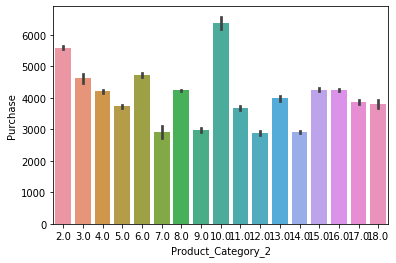

In [60]:
sns.barplot(x='Product_Category_2',y = 'Purchase',data = combined_train_test )

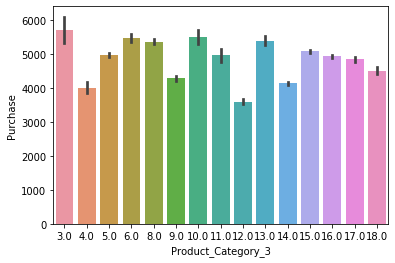

In [61]:
sns.barplot(x='Product_Category_3',y = 'Purchase',data = combined_train_test )

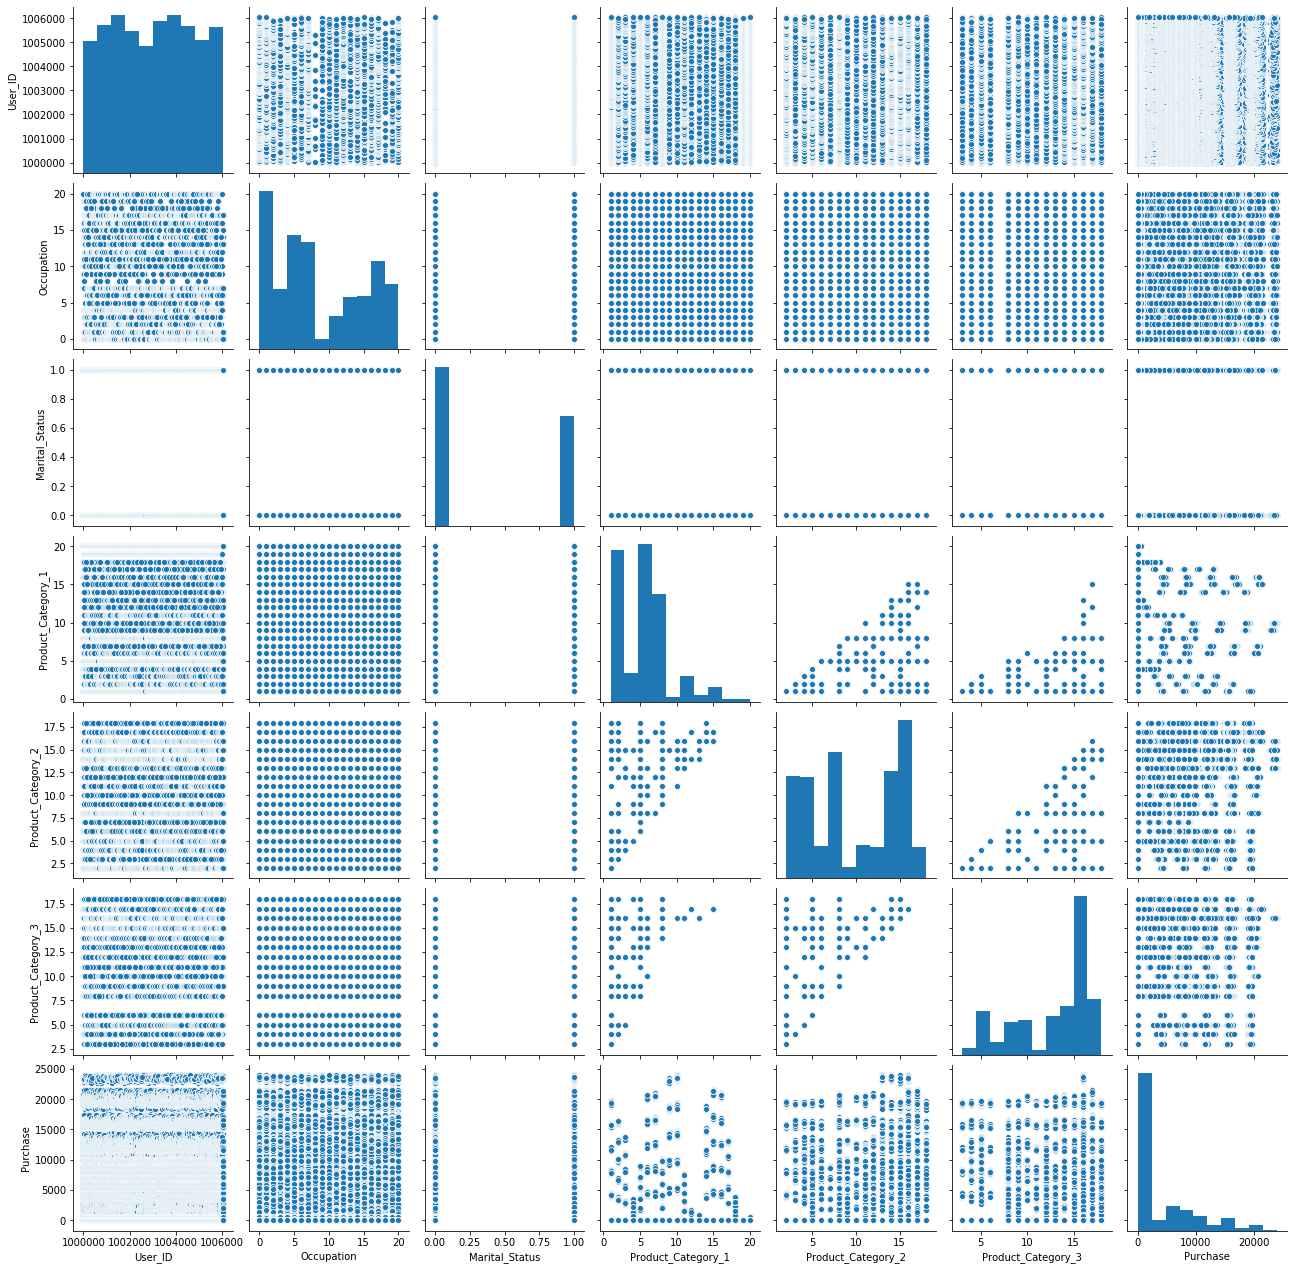

In [62]:
sns.pairplot(combined_train_test)

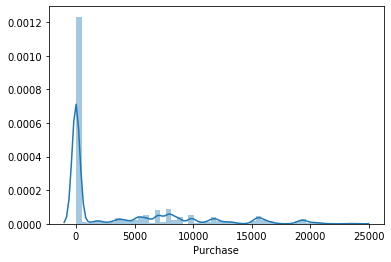

In [63]:
sns.distplot(combined_train_test['Purchase'])

In [64]:
#-----------------------------------------EDA for Unique DataSet-----------------------------------------#

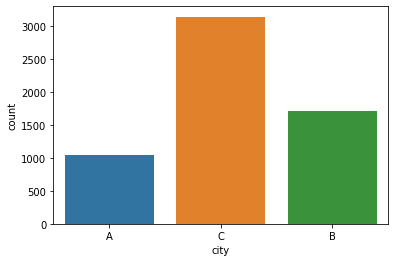

In [66]:
sns.countplot(main_df['city'])

# Observation:
- Population of city C is greater than A and B
- So lets check the sales in all three cities

In [67]:
main_df.groupby(by = ['city']).sum()

user_id    occ   mar    p_1      p_2    purchase
city                                                     
A     1048070887   7942   393   4729   9630.0  1316471661
B     1712273626  13903   703   7286  15253.0  2115533605
C     3148474504  26186  1378  13523  28349.0  1663807476

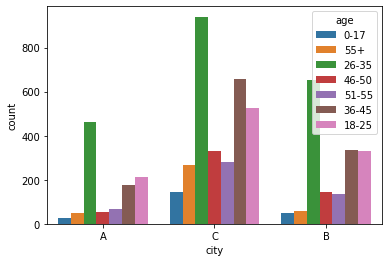

In [70]:
sns.countplot(main_df['city'],hue = main_df['age'] )

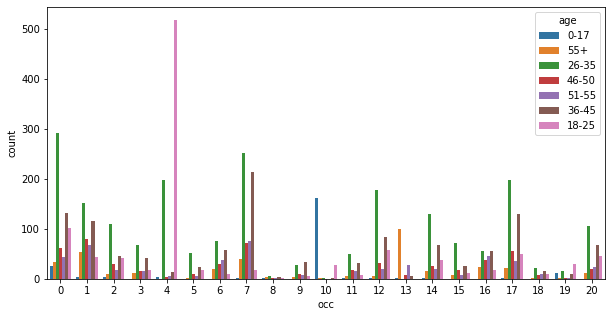

In [73]:
plt.figure(figsize=(10,5))
sns.countplot(main_df['occ'],hue = main_df['age'])

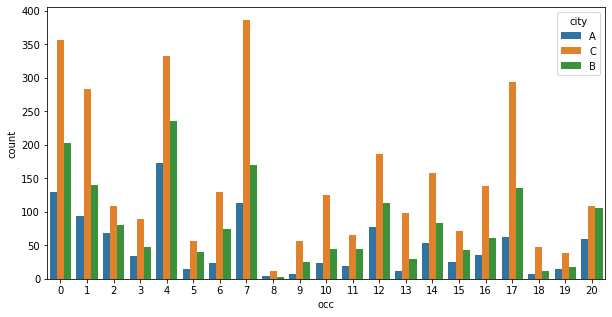

In [74]:
plt.figure(figsize=(10,5))
sns.countplot(main_df['occ'],hue = main_df['city'])

In [76]:
main_df.groupby(by=['age']).sum()

user_id    occ  mar   p_1      p_2    purchase
age                                                     
0-17    218606819   1961    0   890   1843.0   134913183
18-25  1072064462   7122  244  4229   9048.0   913848675
26-35  2059458703  16727  809  8370  18225.0  2031770578
36-45  1170565678  10282  462  5197  10806.0  1026569884
46-50   532627063   4401  375  2512   5174.0   420843403
51-55   482437946   4155  345  2296   4496.0   367099644
55+     373058346   3383  239  2044   3640.0   200767375

In [ ]:
#*-----------------*

In [8]:
bf_train["Product_Category_2_imp"] = np.where(bf_train.Product_Category_2.isnull(), 1, 0)
bf_train["Product_Category_3_imp"] = np.where(bf_train.Product_Category_3.isnull(), 1, 0)

In [10]:
bf_train.Product_Category_2.fillna(bf_train.Product_Category_2.mode()[0], inplace= True)
bf_train.Product_Category_3.fillna(bf_train.Product_Category_3.mode()[0], inplace= True)

In [14]:
bf_test["Product_Category_2_imp"] = np.where(bf_test.Product_Category_2.isnull(), 1, 0)
bf_test["Product_Category_3_imp"] = np.where(bf_test.Product_Category_3.isnull(), 1, 0)

In [30]:
bf_test.Product_Category_2.fillna(bf_test.Product_Category_2.mode()[0], inplace= True)
bf_test.Product_Category_3.fillna(bf_test.Product_Category_3.mode()[0], inplace= True)

In [31]:
bf_train.head(50)

User_ID Product_ID Gender    Age  Occupation City_Category  \
0   1000001  P00069042      F   0-17          10             A   
1   1000001  P00248942      F   0-17          10             A   
2   1000001  P00087842      F   0-17          10             A   
3   1000001  P00085442      F   0-17          10             A   
4   1000002  P00285442      M    55+          16             C   
5   1000003  P00193542      M  26-35          15             A   
6   1000004  P00184942      M  46-50           7             B   
7   1000004  P00346142      M  46-50           7             B   
8   1000004   P0097242      M  46-50           7             B   
9   1000005  P00274942      M  26-35          20             A   
10  1000005  P00251242      M  26-35          20             A   
11  1000005  P00014542      M  26-35          20             A   
12  1000005  P00031342      M  26-35          20             A   
13  1000005  P00145042      M  26-35          20             A   
14  1000006  P00231342      F  51-55           9             A   
15  1000006  P00190242      F  51-55           9             A   
16  1000006   P0096642      F  51-55           9             A   
17  1000006  P00058442      F  51-55           9             A   
18  1000007  P00036842      M  36-45           1             B   
19  1000008  P00249542      M  26-35          12             C   
20  1000008  P00220442      M  26-35          12             C   
21  1000008  P00156442      M  26-35          12             C   
22  1000008  P00213742      M  26-35          12             C   
23  1000008  P00214442      M  26-35          12             C   
24  1000008  P00303442      M  26-35          12             C   
25  1000009  P00135742      M  26-35          17             C   
26  1000009  P00039942      M  26-35          17             C   
27  1000009  P00161442      M  26-35          17             C   
28  1000009  P00078742      M  26-35          17             C   
29  1000010  P00085942      F  36-45           1             B   
30  1000010  P00118742      F  36-45           1             B   
31  1000010  P00297942      F  36-45           1             B   
32  1000010  P00266842      F  36-45           1             B   
33  1000010  P00058342      F  36-45           1             B   
34  1000010  P00032442      F  36-45           1             B   
35  1000010  P00105942      F  36-45           1             B   
36  1000010  P00182642      F  36-45           1             B   
37  1000010  P00186942      F  36-45           1             B   
38  1000010  P00155442      F  36-45           1             B   
39  1000010  P00221342      F  36-45           1             B   
40  1000010  P00087242      F  36-45           1             B   
41  1000010  P00111142      F  36-45           1             B   
42  1000010  P00259342      F  36-45           1             B   
43  1000010   P0094542      F  36-45           1             B   
44  1000010  P00148642      F  36-45           1             B   
45  1000010  P00312142      F  36-45           1             B   
46  1000010  P00113242      F  36-45           1             B   
47  1000011  P00192642      F  26-35           1             C   
48  1000011  P00110842      F  26-35           1             C   
49  1000011  P00189642      F  26-35           1             C   

   Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                           2               0                   3   
1                           2               0                   1   
2                           2               0                  12   
3                           2               0                  12   
4                          4+               0                   8   
5                           3               0                   1   
6                           2               1                   1   
7                           2               1                   1   
8               

In [32]:
bf_test.head(50)

User_ID Product_ID Gender    Age  Occupation City_Category  \
0   1000004  P00128942      M  46-50           7             B   
1   1000009  P00113442      M  26-35          17             C   
2   1000010  P00288442      F  36-45           1             B   
3   1000010  P00145342      F  36-45           1             B   
4   1000011  P00053842      F  26-35           1             C   
5   1000013  P00350442      M  46-50           1             C   
6   1000013  P00155442      M  46-50           1             C   
7   1000013   P0094542      M  46-50           1             C   
8   1000015  P00161842      M  26-35           7             A   
9   1000022  P00067942      M  18-25          15             A   
10  1000026  P00046742      M  26-35           7             B   
11  1000026  P00040042      M  26-35           7             B   
12  1000026  P00196542      M  26-35           7             B   
13  1000026  P00004542      M  26-35           7             B   
14  1000028  P00159542      F  26-35           1             C   
15  1000029  P00111542      M  36-45           7             C   
16  1000033  P00121042      M  46-50           3             A   
17  1000033  P00344442      M  46-50           3             A   
18  1000034  P00265242      F  18-25           0             A   
19  1000035   P0096642      M  46-50           1             C   
20  1000036  P00303042      M  26-35           3             B   
21  1000036  P00059642      M  26-35           3             B   
22  1000042  P00030842      M  26-35           8             C   
23  1000045  P00346442      F  46-50          16             A   
24  1000045  P00357242      F  46-50          16             A   
25  1000045  P00284742      F  46-50          16             A   
26  1000048  P00110842      M  26-35           4             B   
27  1000048  P00251642      M  26-35           4             B   
28  1000053  P00136742      M  26-35           0             B   
29  1000053   P0097342      M  26-35           0             B   
30  1000053  P00168242      M  26-35           0             B   
31  1000053  P00354342      M  26-35           0             B   
32  1000053  P00105042      M  26-35           0             B   
33  1000059  P00177442      F  51-55           1             B   
34  1000062  P00119242      F  36-45           3             A   
35  1000063  P00260242      M  18-25           4             C   
36  1000063  P00113642      M  18-25           4             C   
37  1000065  P00000142      M  36-45          12             C   
38  1000068  P00216342      M  18-25           4             A   
39  1000069  P00157542      F  26-35           1             A   
40  1000073  P00112642      M  18-25           4             A   
41  1000078   P0095842      F  46-50           1             C   
42  1000080  P00112142      M    55+           1             C   
43  1000081  P00109142      F  26-35           0             A   
44  1000081  P00120342      F  26-35           0             A   
45  1000082  P00014542      M  26-35          17             C   
46  1000090  P00117542      M    55+          13             C   
47  1000092  P00220442      F  18-25           4             B   
48  1000092  P00171542      F  18-25           4             B   
49  1000094  P00178242      M  26-35          17             C   

   Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                           2               1                   1   
1                           0               0                   3   
2                          4+               1                   5   
3                          4+               1                   4   
4                           1               0                   4   
5                           3               1                   2   
6                           3               1                   1   
7                           3               1                   2   
8               

In [33]:
bf_train.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
Product_Category_2_imp        0
Product_Category_3_imp        0
dtype: int64

In [34]:
bf_test.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Product_Category_2_imp        0
Product_Category_3_imp        0
dtype: int64

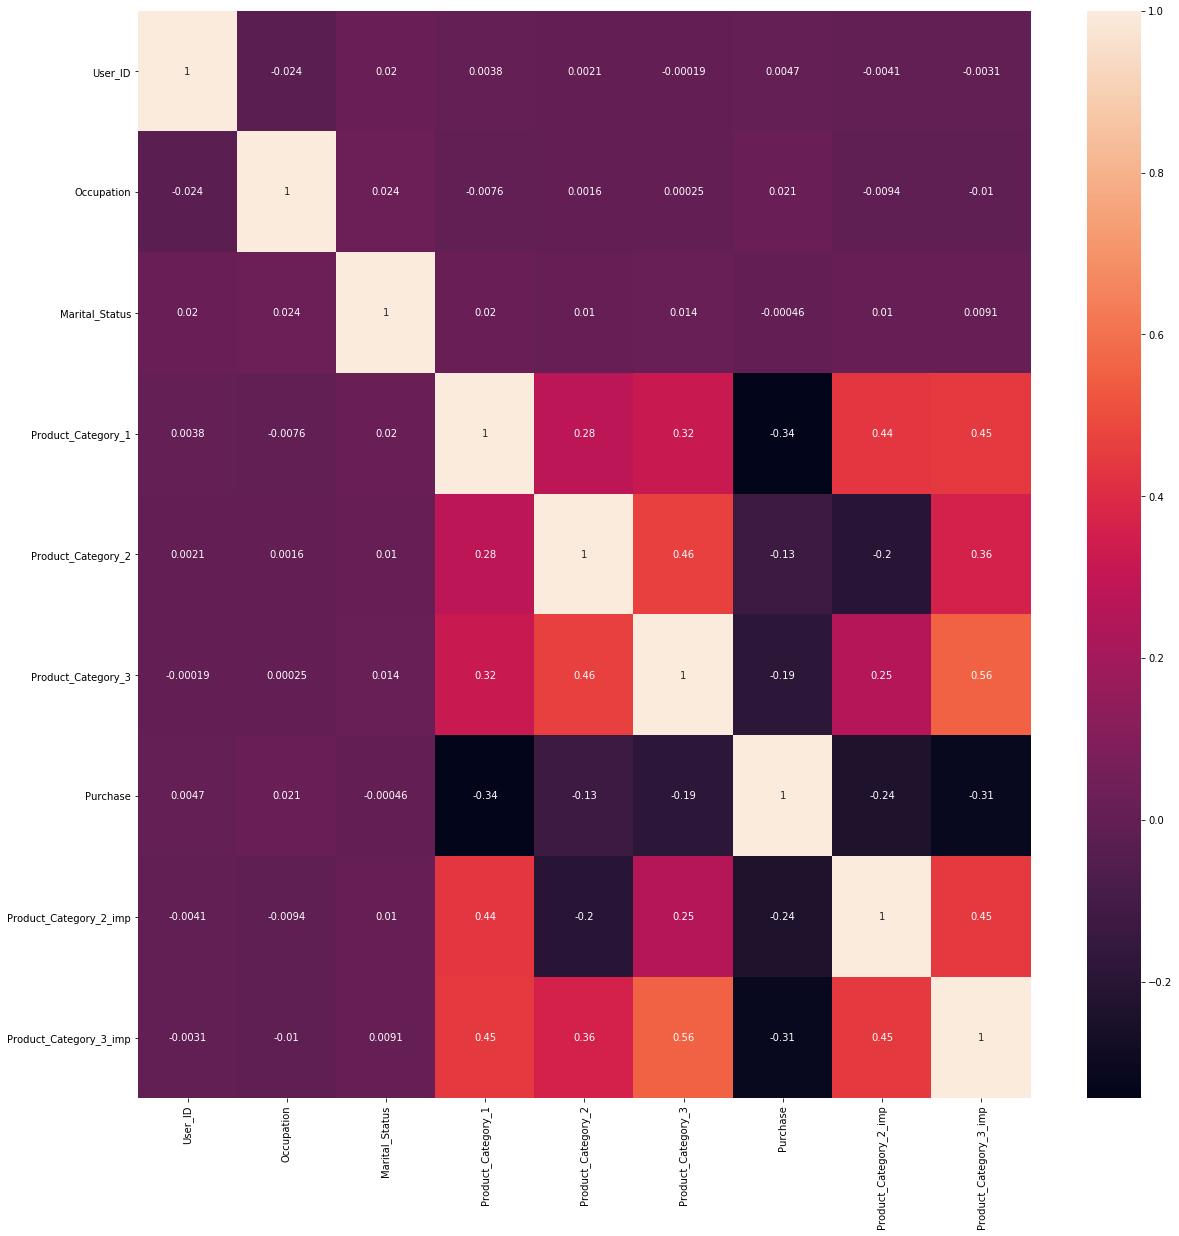

In [35]:
# For better size heatmap is plotted larger
corrmat = bf_train.corr(method = "spearman")
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(bf_train[top_corr_features].corr(),annot=True)

In [37]:
bf_train['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [39]:
bf_train['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [41]:
bf_train['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [43]:
print(bf_train['Product_Category_1'].unique())
print(bf_train['Product_Category_2'].unique())
print(bf_train['Product_Category_3'].unique())

[ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
[ 8.  6. 14.  2. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
[16. 14. 17.  5.  4. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [44]:
bf_train['Age'].value_counts()

26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
bf_train['User_ID'] = bf_train['User_ID'] - 1000000
bf_test['User_ID'] = bf_test['User_ID'] - 1000000

enc = LabelEncoder()
bf_train['User_ID'] = enc.fit_transform(bf_train['User_ID'])
bf_test['User_ID'] = enc.transform(bf_test['User_ID'])
# df_train.drop('User_ID', axis = 1)
# df_test.drop('User_ID', axis = 1)


ValueError: y contains previously unseen labels: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 359, 360, 361, 362, 363, 364, 365, 366, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 473, 474, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 529, 530, 531, 532, 533, 534, 535, 536, 538, 539, 540, 541, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 615, 616, 617, 618, 619, 620, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 685, 686, 687, 688, 689, 690, 691, 692, 693, 694, 695, 697, 698, 700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 936, 937, 939, 940, 941, 942, 943, 944, 945, 946, 947, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 995, 996, 997, 998, 999, 1000, 1002, 1003, 1004, 1005, 1006, 1008, 1009, 1010, 1011, 1012, 1013, 1015, 1016, 1017, 1018, 1019, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1101, 1102, 1103, 1104, 1106, 1107, 1108, 1109, 1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1118, 1119, 1120, 1121, 1122, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133, 1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144, 1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155, 1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1172, 1173, 1174, 1175, 1176, 1177, 1178, 1179, 1180, 1181, 1182, 1183, 1184, 1185, 1186, 1187, 1188, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1201, 1202, 1203, 1204, 1205, 1206, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1215, 1216, 1217, 1218, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1234, 1235, 1236, 1237, 1238, 1239, 1240, 1241, 1242, 1243, 1244, 1246, 1247, 1248, 1249, 1250, 1251, 1252, 1253, 1254, 1255, 1256, 1257, 1258, 1259, 1260, 1261, 1262, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1280, 1281, 1282, 1283, 1284, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397, 1398, 1399, 1400, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1416, 1417, 1418, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1429, 1430, 1431, 1432, 1433, 1434, 1435, 1436, 1437, 1438, 1439, 1440, 1441, 1442, 1443, 1444, 1445, 1446, 1447, 1448, 1449, 1450, 1451, 1452, 1454, 1455, 1456, 1457, 1458, 1459, 1460, 1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470, 1471, 1472, 1473, 1474, 1475, 1476, 1477, 1478, 1479, 1480, 1481, 1482, 1483, 1484, 1485, 1486, 1487, 1488, 1489, 1490, 1491, 1492, 1494, 1495, 1496, 1497, 1498, 1499, 1500, 1501, 1502, 1503, 1504, 1505, 1506, 1507, 1508, 1509, 1510, 1511, 1512, 1513, 1514, 1515, 1516, 1517, 1518, 1519, 1520, 1521, 1522, 1523, 1524, 1525, 1526, 1527, 1528, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1543, 1544, 1545, 1546, 1547, 1548, 1549, 1550, 1551, 1552, 1553, 1554, 1555, 1556, 1557, 1558, 1559, 1560, 1561, 1562, 1563, 1564, 1565, 1566, 1567, 1568, 1569, 1570, 1571, 1572, 1573, 1574, 1575, 1576, 1577, 1578, 1579, 1580, 1581, 1582, 1583, 1584, 1585, 1586, 1587, 1588, 1589, 1590, 1591, 1592, 1593, 1594, 1595, 1596, 1597, 1598, 1599, 1600, 1601, 1602, 1603, 1604, 1605, 1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1616, 1617, 1618, 1619, 1620, 1621, 1622, 1623, 1624, 1625, 1626, 1627, 1628, 1629, 1630, 1631, 1632, 1633, 1634, 1635, 1636, 1637, 1638, 1639, 1640, 1641, 1642, 1643, 1644, 1645, 1646, 1647, 1648, 1649, 1650, 1651, 1652, 1653, 1654, 1655, 1656, 1657, 1658, 1659, 1660, 1661, 1662, 1663, 1665, 1666, 1667, 1668, 1669, 1670, 1671, 1672, 1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682, 1683, 1684, 1685, 1686, 1687, 1688, 1691, 1692, 1693, 1694, 1695, 1696, 1697, 1699, 1700, 1701, 1702, 1703, 1704, 1705, 1706, 1707, 1708, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 1716, 1717, 1718, 1719, 1720, 1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738, 1739, 1740, 1741, 1742, 1743, 1744, 1745, 1746, 1747, 1748, 1749, 1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1812, 1813, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2078, 2079, 2080, 2081, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100, 2101, 2102, 2103, 2104, 2105, 2106, 2107, 2108, 2109, 2110, 2111, 2112, 2113, 2114, 2115, 2116, 2117, 2118, 2119, 2121, 2122, 2123, 2124, 2125, 2126, 2127, 2128, 2129, 2130, 2131, 2132, 2133, 2134, 2135, 2136, 2137, 2138, 2139, 2140, 2141, 2142, 2143, 2144, 2145, 2146, 2147, 2148, 2149, 2150, 2151, 2152, 2153, 2154, 2155, 2156, 2157, 2158, 2159, 2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167, 2168, 2169, 2170, 2171, 2172, 2173, 2174, 2175, 2176, 2177, 2178, 2179, 2180, 2181, 2182, 2183, 2184, 2185, 2186, 2187, 2188, 2189, 2190, 2191, 2192, 2193, 2194, 2195, 2196, 2197, 2198, 2199, 2200, 2201, 2202, 2203, 2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226, 2227, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237, 2238, 2239, 2240, 2241, 2242, 2243, 2245, 2247, 2248, 2249, 2250, 2251, 2252, 2253, 2254, 2255, 2256, 2257, 2258, 2259, 2260, 2261, 2262, 2263, 2264, 2265, 2266, 2267, 2268, 2269, 2270, 2271, 2272, 2273, 2274, 2275, 2276, 2278, 2279, 2280, 2281, 2283, 2284, 2285, 2286, 2287, 2288, 2289, 2291, 2292, 2293, 2294, 2295, 2296, 2297, 2298, 2299, 2300, 2302, 2303, 2304, 2305, 2306, 2307, 2308, 2309, 2310, 2311, 2312, 2313, 2314, 2315, 2316, 2318, 2319, 2320, 2321, 2322, 2323, 2324, 2325, 2326, 2327, 2328, 2329, 2330, 2331, 2332, 2333, 2334, 2335, 2336, 2337, 2338, 2339, 2340, 2341, 2342, 2343, 2344, 2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 2359, 2360, 2361, 2362, 2363, 2364, 2365, 2366, 2367, 2368, 2369, 2370, 2371, 2372, 2374, 2375, 2376, 2377, 2378, 2379, 2380, 2381, 2382, 2383, 2384, 2385, 2386, 2387, 2388, 2389, 2390, 2391, 2392, 2393, 2394, 2395, 2396, 2397, 2398, 2399, 2401, 2402, 2404, 2405, 2406, 2407, 2408, 2409, 2410, 2411, 2412, 2413, 2414, 2415, 2416, 2417, 2418, 2419, 2420, 2421, 2422, 2423, 2424, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 2434, 2435, 2436, 2437, 2438, 2439, 2440, 2441, 2442, 2443, 2444, 2445, 2446, 2447, 2449, 2450, 2451, 2452, 2453, 2454, 2455, 2456, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 2465, 2466, 2467, 2468, 2469, 2470, 2471, 2472, 2473, 2474, 2475, 2476, 2477, 2478, 2479, 2480, 2481, 2482, 2483, 2484, 2485, 2486, 2487, 2488, 2489, 2490, 2491, 2492, 2493, 2494, 2495, 2496, 2497, 2498, 2499, 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507, 2508, 2509, 2510, 2511, 2512, 2513, 2514, 2515, 2516, 2517, 2518, 2519, 2520, 2521, 2522, 2523, 2524, 2525, 2526, 2527, 2528, 2529, 2530, 2531, 2532, 2533, 2534, 2535, 2536, 2537, 2538, 2539, 2540, 2541, 2542, 2543, 2544, 2545, 2546, 2547, 2548, 2549, 2550, 2551, 2552, 2553, 2554, 2555, 2556, 2557, 2558, 2559, 2560, 2561, 2563, 2564, 2565, 2566, 2567, 2568, 2569, 2570, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578, 2579, 2580, 2581, 2582, 2583, 2584, 2585, 2586, 2587, 2588, 2589, 2590, 2591, 2592, 2593, 2594, 2595, 2596, 2597, 2598, 2599, 2600, 2601, 2602, 2603, 2604, 2605, 2606, 2607, 2608, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 2619, 2620, 2621, 2622, 2623, 2624, 2625, 2626, 2627, 2628, 2629, 2630, 2631, 2632, 2633, 2634, 2636, 2637, 2638, 2639, 2640, 2641, 2642, 2643, 2644, 2645, 2646, 2647, 2648, 2649, 2650, 2651, 2652, 2653, 2654, 2655, 2656, 2657, 2658, 2659, 2660, 2661, 2662, 2663, 2664, 2665, 2666, 2667, 2668, 2669, 2670, 2671, 2672, 2673, 2674, 2675, 2676, 2677, 2678, 2679, 2680, 2681, 2682, 2683, 2684, 2685, 2686, 2687, 2688, 2689, 2690, 2691, 2692, 2693, 2694, 2695, 2696, 2697, 2698, 2699, 2700, 2701, 2703, 2704, 2705, 2706, 2707, 2708, 2709, 2710, 2711, 2712, 2713, 2714, 2715, 2716, 2717, 2718, 2719, 2720, 2721, 2722, 2724, 2725, 2726, 2727, 2728, 2729, 2730, 2731, 2732, 2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742, 2743, 2744, 2745, 2746, 2747, 2748, 2749, 2750, 2751, 2752, 2753, 2754, 2755, 2756, 2757, 2758, 2759, 2760, 2761, 2762, 2763, 2764, 2765, 2766, 2767, 2768, 2769, 2770, 2771, 2772, 2773, 2774, 2775, 2776, 2777, 2778, 2779, 2780, 2781, 2782, 2783, 2784, 2785, 2786, 2787, 2788, 2789, 2790, 2791, 2792, 2793, 2794, 2795, 2796, 2797, 2798, 2799, 2800, 2801, 2802, 2803, 2804, 2805, 2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2815, 2816, 2817, 2818, 2819, 2820, 2821, 2822, 2823, 2824, 2825, 2826, 2827, 2828, 2830, 2831, 2832, 2833, 2834, 2835, 2836, 2837, 2838, 2839, 2840, 2841, 2842, 2843, 2844, 2845, 2846, 2847, 2848, 2849, 2850, 2851, 2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862, 2863, 2864, 2865, 2866, 2867, 2868, 2869, 2870, 2871, 2872, 2873, 2874, 2875, 2876, 2877, 2878, 2879, 2880, 2881, 2882, 2883, 2884, 2885, 2886, 2887, 2888, 2889, 2890, 2891, 2892, 2893, 2894, 2895, 2896, 2897, 2898, 2899, 2900, 2901, 2902, 2903, 2904, 2905, 2906, 2907, 2908, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919, 2920, 2921, 2922, 2924, 2925, 2926, 2927, 2928, 2929, 2930, 2931, 2932, 2933, 2934, 2935, 2936, 2937, 2938, 2939, 2940, 2941, 2942, 2943, 2945, 2946, 2947, 2948, 2949, 2950, 2951, 2952, 2953, 2954, 2955, 2956, 2957, 2958, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967, 2968, 2969, 2970, 2971, 2972, 2973, 2974, 2975, 2977, 2978, 2979, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997, 2998, 2999, 3000, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 3131, 3132, 3133, 3134, 3135, 3136, 3138, 3140, 3141, 3142, 3143, 3144, 3145, 3146, 3147, 3148, 3149, 3150, 3151, 3152, 3153, 3154, 3155, 3156, 3157, 3158, 3159, 3160, 3161, 3164, 3165, 3166, 3167, 3168, 3169, 3170, 3171, 3172, 3173, 3174, 3175, 3176, 3177, 3178, 3180, 3181, 3182, 3183, 3184, 3185, 3186, 3187, 3188, 3189, 3190, 3191, 3192, 3193, 3194, 3195, 3196, 3197, 3198, 3199, 3200, 3201, 3202, 3203, 3204, 3205, 3206, 3207, 3208, 3209, 3211, 3212, 3213, 3214, 3215, 3216, 3217, 3218, 3219, 3220, 3221, 3222, 3223, 3224, 3225, 3226, 3227, 3229, 3230, 3231, 3232, 3233, 3234, 3235, 3237, 3238, 3239, 3240, 3241, 3242, 3243, 3244, 3245, 3246, 3247, 3248, 3249, 3250, 3251, 3252, 3253, 3254, 3255, 3256, 3257, 3258, 3259, 3260, 3261, 3262, 3263, 3264, 3265, 3266, 3267, 3268, 3269, 3270, 3272, 3273, 3274, 3275, 3276, 3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286, 3287, 3288, 3289, 3290, 3291, 3292, 3293, 3294, 3295, 3296, 3297, 3298, 3299, 3300, 3301, 3302, 3303, 3304, 3305, 3306, 3307, 3308, 3309, 3310, 3311, 3312, 3313, 3314, 3315, 3316, 3317, 3318, 3319, 3320, 3321, 3322, 3323, 3324, 3325, 3326, 3327, 3328, 3329, 3330, 3331, 3332, 3333, 3334, 3335, 3336, 3337, 3338, 3339, 3340, 3341, 3342, 3343, 3344, 3345, 3346, 3347, 3348, 3349, 3351, 3352, 3353, 3354, 3355, 3356, 3357, 3358, 3359, 3360, 3361, 3362, 3363, 3364, 3365, 3366, 3367, 3368, 3370, 3371, 3372, 3373, 3374, 3375, 3376, 3377, 3378, 3379, 3380, 3381, 3382, 3383, 3384, 3385, 3386, 3387, 3388, 3389, 3390, 3391, 3392, 3393, 3394, 3395, 3396, 3397, 3398, 3399, 3400, 3401, 3402, 3403, 3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 3413, 3414, 3415, 3416, 3417, 3418, 3419, 3420, 3421, 3422, 3423, 3424, 3425, 3426, 3427, 3428, 3429, 3430, 3431, 3432, 3433, 3434, 3435, 3436, 3437, 3438, 3439, 3440, 3441, 3442, 3443, 3444, 3445, 3446, 3447, 3448, 3449, 3450, 3451, 3452, 3453, 3454, 3455, 3456, 3457, 3458, 3459, 3460, 3461, 3462, 3463, 3464, 3465, 3466, 3467, 3468, 3469, 3470, 3471, 3472, 3473, 3474, 3475, 3476, 3477, 3478, 3479, 3480, 3481, 3482, 3483, 3484, 3485, 3486, 3487, 3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495, 3496, 3497, 3498, 3499, 3500, 3501, 3502, 3503, 3504, 3505, 3506, 3507, 3508, 3509, 3510, 3511, 3512, 3513, 3514, 3515, 3516, 3517, 3518, 3519, 3521, 3522, 3523, 3524, 3525, 3526, 3527, 3528, 3529, 3530, 3531, 3532, 3533, 3535, 3536, 3537, 3538, 3539, 3540, 3541, 3542, 3543, 3544, 3545, 3546, 3547, 3548, 3549, 3550, 3551, 3552, 3553, 3554, 3555, 3556, 3557, 3558, 3559, 3560, 3562, 3563, 3564, 3565, 3566, 3567, 3568, 3569, 3571, 3572, 3573, 3574, 3575, 3576, 3577, 3578, 3579, 3580, 3581, 3582, 3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592, 3593, 3594, 3595, 3596, 3597, 3598, 3599, 3600, 3601, 3602, 3603, 3604, 3605, 3606, 3607, 3608, 3609, 3610, 3611, 3612, 3613, 3614, 3615, 3616, 3617, 3618, 3619, 3620, 3621, 3622, 3623, 3624, 3625, 3626, 3627, 3628, 3629, 3630, 3631, 3632, 3633, 3634, 3635, 3636, 3637, 3638, 3639, 3640, 3641, 3642, 3643, 3644, 3645, 3646, 3647, 3648, 3649, 3650, 3651, 3652, 3653, 3654, 3655, 3656, 3657, 3658, 3659, 3660, 3661, 3662, 3663, 3664, 3665, 3667, 3668, 3669, 3670, 3671, 3672, 3673, 3675, 3676, 3677, 3678, 3679, 3680, 3681, 3682, 3683, 3684, 3685, 3686, 3687, 3688, 3689, 3690, 3691, 3692, 3693, 3694, 3695, 3696, 3697, 3698, 3699, 3700, 3701, 3702, 3703, 3704, 3705, 3706, 3707, 3708, 3709, 3710, 3711, 3712, 3713, 3714, 3715, 3716, 3717, 3718, 3719, 3720, 3721, 3722, 3723, 3724, 3725, 3726, 3727, 3728, 3729, 3730, 3731, 3732, 3733, 3734, 3735, 3736, 3737, 3738, 3739, 3740, 3741, 3742, 3743, 3744, 3745, 3746, 3747, 3748, 3749, 3750, 3751, 3752, 3753, 3754, 3755, 3756, 3757, 3758, 3759, 3760, 3761, 3762, 3763, 3764, 3765, 3766, 3767, 3768, 3769, 3770, 3771, 3772, 3773, 3774, 3775, 3776, 3777, 3778, 3779, 3780, 3781, 3782, 3783, 3784, 3785, 3786, 3787, 3788, 3789, 3790, 3791, 3792, 3793, 3794, 3795, 3796, 3797, 3798, 3799, 3800, 3801, 3802, 3803, 3804, 3805, 3806, 3807, 3808, 3809, 3810, 3811, 3812, 3813, 3814, 3815, 3816, 3817, 3818, 3819, 3820, 3821, 3822, 3823, 3824, 3825, 3826, 3827, 3828, 3829, 3830, 3831, 3832, 3833, 3834, 3835, 3836, 3837, 3838, 3839, 3840, 3841, 3842, 3843, 3844, 3845, 3846, 3847, 3848, 3849, 3850, 3851, 3852, 3853, 3854, 3855, 3856, 3857, 3858, 3859, 3860, 3861, 3862, 3863, 3864, 3865, 3866, 3868, 3869, 3870, 3871, 3872, 3873, 3874, 3875, 3876, 3877, 3878, 3879, 3880, 3881, 3882, 3883, 3884, 3885, 3886, 3887, 3888, 3889, 3890, 3891, 3892, 3893, 3894, 3895, 3896, 3897, 3898, 3899, 3900, 3901, 3902, 3903, 3904, 3905, 3906, 3907, 3908, 3909, 3910, 3911, 3912, 3913, 3914, 3915, 3916, 3917, 3918, 3919, 3920, 3921, 3922, 3923, 3924, 3925, 3927, 3928, 3929, 3930, 3931, 3932, 3933, 3934, 3935, 3936, 3937, 3938, 3939, 3940, 3941, 3942, 3943, 3944, 3945, 3946, 3947, 3948, 3949, 3950, 3951, 3952, 3953, 3954, 3955, 3956, 3957, 3958, 3959, 3960, 3961, 3962, 3963, 3964, 3965, 3966, 3967, 3968, 3969, 3970, 3971, 3972, 3973, 3974, 3975, 3976, 3977, 3978, 3979, 3980, 3981, 3982, 3983, 3984, 3985, 3986, 3987, 3988, 3989, 3990, 3991, 3992, 3993, 3994, 3995, 3996, 3997, 3998, 3999, 4000, 4001, 4002, 4003, 4004, 4005, 4006, 4007, 4008, 4009, 4010, 4011, 4012, 4013, 4014, 4015, 4016, 4017, 4018, 4019, 4020, 4021, 4022, 4023, 4024, 4025, 4026, 4027, 4028, 4029, 4030, 4031, 4032, 4033, 4034, 4035, 4036, 4037, 4038, 4039, 4040, 4041, 4042, 4043, 4044, 4045, 4046, 4047, 4048, 4049, 4050, 4051, 4052, 4053, 4054, 4055, 4056, 4057, 4058, 4059, 4060, 4061, 4062, 4063, 4064, 4065, 4066, 4067, 4068, 4069, 4070, 4071, 4072, 4074, 4075, 4076, 4077, 4078, 4079, 4080, 4081, 4082, 4083, 4084, 4085, 4086, 4087, 4088, 4089, 4090, 4091, 4092, 4093, 4094, 4097, 4098, 4099, 4100, 4101, 4102, 4103, 4104, 4105, 4106, 4107, 4108, 4109, 4110, 4111, 4112, 4113, 4114, 4115, 4116, 4117, 4118, 4119, 4120, 4121, 4122, 4123, 4124, 4125, 4126, 4127, 4128, 4129, 4130, 4131, 4132, 4133, 4134, 4135, 4136, 4137, 4138, 4139, 4140, 4141, 4142, 4143, 4144, 4145, 4146, 4147, 4148, 4149, 4150, 4152, 4153, 4154, 4155, 4156, 4157, 4158, 4159, 4160, 4161, 4162, 4163, 4164, 4165, 4166, 4167, 4168, 4170, 4171, 4172, 4173, 4174, 4175, 4176, 4177, 4178, 4179, 4180, 4181, 4182, 4183, 4184, 4185, 4186, 4187, 4188, 4189, 4190, 4191, 4192, 4193, 4194, 4196, 4197, 4198, 4199, 4200, 4201, 4203, 4204, 4205, 4206, 4207, 4208, 4209, 4210, 4211, 4213, 4214, 4215, 4216, 4217, 4218, 4220, 4221, 4222, 4223, 4224, 4225, 4226, 4227, 4228, 4229, 4230, 4231, 4232, 4233, 4234, 4235, 4236, 4237, 4238, 4239, 4240, 4241, 4242, 4243, 4244, 4245, 4246, 4247, 4248, 4249, 4250, 4251, 4252, 4253, 4254, 4255, 4256, 4257, 4258, 4259, 4260, 4261, 4262, 4263, 4264, 4265, 4266, 4267, 4268, 4269, 4270, 4271, 4272, 4273, 4274, 4275, 4276, 4277, 4278, 4279, 4280, 4281, 4282, 4283, 4284, 4285, 4286, 4287, 4288, 4289, 4290, 4291, 4292, 4293, 4294, 4295, 4296, 4297, 4298, 4300, 4301, 4302, 4303, 4304, 4305, 4306, 4307, 4308, 4309, 4310, 4311, 4312, 4313, 4314, 4315, 4316, 4317, 4318, 4319, 4320, 4321, 4322, 4323, 4324, 4325, 4326, 4327, 4328, 4329, 4330, 4331, 4332, 4333, 4334, 4335, 4336, 4337, 4338, 4339, 4340, 4341, 4342, 4343, 4344, 4345, 4346, 4347, 4348, 4349, 4350, 4351, 4352, 4353, 4354, 4355, 4356, 4357, 4358, 4359, 4360, 4361, 4362, 4363, 4365, 4366, 4367, 4368, 4369, 4370, 4371, 4372, 4373, 4374, 4375, 4376, 4377, 4378, 4379, 4380, 4381, 4382, 4383, 4384, 4385, 4386, 4387, 4388, 4389, 4390, 4391, 4392, 4393, 4394, 4395, 4396, 4397, 4398, 4399, 4400, 4401, 4402, 4403, 4404, 4405, 4406, 4407, 4408, 4409, 4410, 4411, 4412, 4413, 4414, 4415, 4416, 4417, 4418, 4419, 4420, 4421, 4422, 4423, 4424, 4425, 4426, 4427, 4428, 4429, 4430, 4431, 4432, 4433, 4434, 4435, 4436, 4437, 4438, 4439, 4440, 4441, 4442, 4443, 4444, 4445, 4446, 4447, 4448, 4449, 4450, 4451, 4452, 4453, 4454, 4455, 4456, 4457, 4458, 4459, 4460, 4461, 4462, 4463, 4464, 4465, 4466, 4467, 4468, 4469, 4470, 4471, 4472, 4473, 4474, 4475, 4476, 4477, 4478, 4479, 4480, 4481, 4482, 4483, 4484, 4485, 4486, 4487, 4488, 4489, 4490, 4491, 4492, 4493, 4494, 4495, 4496, 4497, 4498, 4499, 4500, 4501, 4502, 4503, 4504, 4505, 4506, 4507, 4508, 4509, 4510, 4511, 4512, 4513, 4514, 4515, 4516, 4517, 4518, 4519, 4520, 4521, 4522, 4524, 4525, 4526, 4527, 4528, 4529, 4530, 4531, 4532, 4533, 4534, 4535, 4536, 4537, 4538, 4539, 4540, 4541, 4542, 4543, 4544, 4545, 4546, 4547, 4548, 4549, 4550, 4551, 4552, 4553, 4554, 4555, 4556, 4557, 4558, 4559, 4560, 4561, 4562, 4563, 4564, 4565, 4566, 4567, 4568, 4569, 4570, 4571, 4572, 4573, 4574, 4575, 4576, 4577, 4578, 4579, 4580, 4581, 4582, 4583, 4584, 4585, 4586, 4587, 4588, 4589, 4590, 4591, 4592, 4593, 4594, 4595, 4596, 4597, 4598, 4599, 4600, 4601, 4602, 4603, 4604, 4606, 4607, 4608, 4609, 4610, 4611, 4612, 4613, 4614, 4615, 4616, 4617, 4618, 4619, 4620, 4621, 4622, 4623, 4624, 4625, 4626, 4627, 4628, 4629, 4630, 4631, 4632, 4633, 4634, 4635, 4636, 4637, 4638, 4639, 4640, 4641, 4642, 4643, 4644, 4645, 4646, 4647, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4655, 4656, 4657, 4658, 4659, 4660, 4661, 4662, 4663, 4664, 4665, 4666, 4667, 4668, 4669, 4670, 4671, 4672, 4673, 4674, 4675, 4676, 4677, 4678, 4679, 4680, 4681, 4682, 4683, 4685, 4686, 4687, 4688, 4689, 4690, 4691, 4692, 4693, 4694, 4695, 4696, 4697, 4698, 4699, 4701, 4702, 4703, 4704, 4705, 4706, 4707, 4708, 4709, 4710, 4711, 4712, 4713, 4714, 4715, 4717, 4718, 4719, 4720, 4721, 4722, 4723, 4724, 4725, 4726, 4727, 4728, 4729, 4730, 4731, 4732, 4733, 4734, 4735, 4736, 4737, 4738, 4739, 4740, 4741, 4742, 4743, 4744, 4745, 4746, 4747, 4748, 4749, 4750, 4751, 4752, 4753, 4755, 4756, 4757, 4758, 4759, 4760, 4761, 4762, 4763, 4764, 4765, 4766, 4767, 4768, 4769, 4770, 4771, 4772, 4773, 4774, 4775, 4776, 4777, 4778, 4779, 4780, 4781, 4782, 4783, 4784, 4785, 4786, 4787, 4788, 4789, 4790, 4791, 4792, 4793, 4794, 4795, 4796, 4797, 4798, 4799, 4800, 4801, 4802, 4803, 4804, 4806, 4807, 4808, 4809, 4810, 4811, 4812, 4813, 4814, 4815, 4817, 4818, 4819, 4820, 4821, 4822, 4823, 4824, 4825, 4826, 4827, 4828, 4829, 4830, 4831, 4832, 4833, 4834, 4836, 4837, 4838, 4839, 4840, 4841, 4842, 4843, 4844, 4845, 4846, 4847, 4848, 4849, 4850, 4851, 4852, 4853, 4854, 4855, 4856, 4857, 4858, 4859, 4860, 4861, 4862, 4863, 4864, 4865, 4866, 4867, 4868, 4869, 4870, 4871, 4872, 4873, 4874, 4875, 4876, 4877, 4878, 4879, 4880, 4881, 4882, 4883, 4884, 4885, 4886, 4887, 4888, 4889, 4890, 4891, 4892, 4893, 4894, 4895, 4896, 4897, 4898, 4899, 4900, 4901, 4902, 4903, 4904, 4905, 4906, 4907, 4908, 4909, 4910, 4911, 4912, 4913, 4914, 4915, 4916, 4917, 4918, 4919, 4920, 4921, 4922, 4923, 4924, 4925, 4926, 4927, 4928, 4929, 4930, 4931, 4933, 4934, 4935, 4936, 4937, 4938, 4939, 4940, 4941, 4942, 4943, 4944, 4945, 4946, 4947, 4948, 4949, 4950, 4951, 4952, 4953, 4954, 4955, 4956, 4957, 4958, 4960, 4961, 4962, 4963, 4964, 4965, 4966, 4967, 4968, 4969, 4970, 4971, 4972, 4973, 4974, 4975, 4976, 4977, 4978, 4979, 4980, 4982, 4983, 4984, 4985, 4986, 4987, 4988, 4989, 4990, 4991, 4992, 4993, 4994, 4995, 4996, 4997, 4998, 4999, 5000, 5001, 5002, 5003, 5004, 5005, 5006, 5007, 5008, 5009, 5010, 5011, 5012, 5013, 5014, 5015, 5016, 5017, 5018, 5019, 5020, 5021, 5023, 5024, 5025, 5026, 5027, 5028, 5029, 5030, 5031, 5032, 5033, 5034, 5035, 5036, 5037, 5038, 5039, 5040, 5041, 5042, 5043, 5044, 5045, 5046, 5047, 5048, 5049, 5050, 5051, 5052, 5053, 5054, 5055, 5056, 5057, 5058, 5059, 5060, 5061, 5062, 5063, 5064, 5065, 5066, 5067, 5068, 5069, 5070, 5071, 5072, 5074, 5075, 5076, 5077, 5078, 5079, 5080, 5081, 5082, 5083, 5084, 5085, 5086, 5087, 5088, 5089, 5090, 5091, 5092, 5094, 5095, 5096, 5097, 5098, 5099, 5100, 5101, 5102, 5103, 5104, 5105, 5106, 5107, 5108, 5109, 5110, 5111, 5112, 5113, 5114, 5115, 5116, 5117, 5118, 5119, 5120, 5121, 5122, 5123, 5124, 5125, 5126, 5127, 5128, 5129, 5131, 5132, 5133, 5134, 5135, 5136, 5137, 5138, 5139, 5140, 5141, 5142, 5143, 5144, 5145, 5146, 5147, 5148, 5149, 5150, 5151, 5152, 5153, 5154, 5155, 5156, 5157, 5158, 5159, 5160, 5161, 5162, 5163, 5164, 5165, 5166, 5167, 5168, 5169, 5170, 5171, 5172, 5173, 5174, 5175, 5176, 5177, 5178, 5179, 5180, 5181, 5182, 5183, 5184, 5185, 5186, 5187, 5190, 5191, 5192, 5193, 5194, 5195, 5196, 5197, 5198, 5199, 5200, 5201, 5202, 5203, 5204, 5205, 5206, 5207, 5208, 5209, 5210, 5212, 5213, 5214, 5215, 5216, 5217, 5218, 5219, 5220, 5221, 5222, 5223, 5224, 5225, 5226, 5228, 5229, 5230, 5231, 5232, 5233, 5234, 5235, 5236, 5237, 5238, 5239, 5240, 5241, 5242, 5243, 5244, 5245, 5246, 5247, 5248, 5249, 5250, 5251, 5252, 5253, 5254, 5255, 5256, 5257, 5258, 5259, 5260, 5261, 5262, 5263, 5264, 5265, 5266, 5267, 5269, 5270, 5271, 5272, 5273, 5274, 5275, 5276, 5277, 5278, 5279, 5280, 5281, 5282, 5283, 5284, 5285, 5286, 5287, 5288, 5290, 5291, 5292, 5293, 5294, 5295, 5296, 5297, 5298, 5299, 5300, 5301, 5302, 5303, 5304, 5305, 5306, 5307, 5308, 5309, 5310, 5311, 5312, 5313, 5314, 5315, 5316, 5317, 5318, 5319, 5320, 5321, 5322, 5323, 5324, 5325, 5326, 5327, 5328, 5329, 5330, 5332, 5333, 5334, 5335, 5336, 5337, 5338, 5339, 5340, 5341, 5342, 5343, 5344, 5345, 5346, 5347, 5348, 5349, 5350, 5351, 5352, 5353, 5355, 5357, 5358, 5359, 5360, 5361, 5362, 5363, 5364, 5365, 5366, 5367, 5368, 5369, 5370, 5371, 5372, 5373, 5374, 5375, 5376, 5377, 5378, 5379, 5380, 5381, 5382, 5383, 5384, 5385, 5386, 5387, 5388, 5389, 5390, 5391, 5392, 5393, 5394, 5395, 5396, 5397, 5398, 5399, 5400, 5401, 5402, 5403, 5404, 5406, 5407, 5408, 5409, 5410, 5411, 5412, 5413, 5414, 5415, 5416, 5417, 5418, 5419, 5420, 5421, 5422, 5423, 5424, 5425, 5426, 5427, 5428, 5429, 5430, 5431, 5432, 5433, 5434, 5435, 5436, 5437, 5438, 5439, 5440, 5441, 5442, 5443, 5444, 5445, 5446, 5447, 5448, 5449, 5450, 5451, 5452, 5453, 5454, 5455, 5456, 5457, 5458, 5459, 5460, 5461, 5462, 5463, 5464, 5465, 5466, 5467, 5468, 5469, 5470, 5471, 5472, 5473, 5474, 5475, 5476, 5477, 5478, 5479, 5480, 5481, 5482, 5483, 5484, 5485, 5486, 5487, 5488, 5489, 5490, 5491, 5492, 5493, 5494, 5495, 5496, 5497, 5498, 5499, 5500, 5501, 5502, 5503, 5504, 5505, 5506, 5507, 5508, 5509, 5510, 5511, 5512, 5513, 5514, 5515, 5516, 5517, 5518, 5519, 5520, 5521, 5522, 5523, 5524, 5525, 5526, 5527, 5528, 5529, 5530, 5531, 5532, 5533, 5534, 5535, 5536, 5537, 5538, 5539, 5540, 5541, 5542, 5543, 5544, 5545, 5546, 5547, 5548, 5549, 5550, 5551, 5552, 5553, 5554, 5555, 5556, 5557, 5558, 5559, 5560, 5561, 5562, 5563, 5564, 5565, 5566, 5567, 5568, 5570, 5571, 5572, 5573, 5574, 5575, 5576, 5577, 5578, 5579, 5580, 5581, 5582, 5583, 5584, 5585, 5586, 5587, 5588, 5589, 5590, 5591, 5592, 5593, 5594, 5595, 5596, 5597, 5598, 5599, 5600, 5601, 5602, 5604, 5605, 5606, 5607, 5608, 5609, 5610, 5611, 5612, 5613, 5615, 5616, 5617, 5618, 5619, 5620, 5621, 5622, 5623, 5624, 5625, 5626, 5627, 5628, 5629, 5630, 5631, 5632, 5633, 5634, 5635, 5636, 5637, 5638, 5639, 5640, 5641, 5642, 5643, 5644, 5645, 5646, 5647, 5648, 5649, 5650, 5651, 5652, 5653, 5654, 5655, 5656, 5657, 5658, 5659, 5660, 5661, 5662, 5663, 5664, 5665, 5667, 5668, 5669, 5670, 5671, 5672, 5673, 5674, 5675, 5676, 5677, 5678, 5679, 5680, 5681, 5682, 5683, 5684, 5685, 5686, 5687, 5688, 5689, 5690, 5691, 5692, 5693, 5694, 5695, 5696, 5697, 5698, 5699, 5700, 5701, 5702, 5703, 5704, 5705, 5708, 5709, 5710, 5711, 5712, 5713, 5714, 5716, 5717, 5718, 5719, 5720, 5721, 5722, 5724, 5725, 5726, 5727, 5728, 5729, 5730, 5731, 5732, 5733, 5734, 5735, 5736, 5737, 5738, 5739, 5740, 5741, 5742, 5743, 5744, 5745, 5746, 5747, 5748, 5749, 5750, 5751, 5752, 5753, 5754, 5755, 5756, 5757, 5758, 5759, 5760, 5761, 5762, 5763, 5764, 5765, 5766, 5767, 5768, 5769, 5770, 5771, 5772, 5773, 5774, 5775, 5776, 5777, 5778, 5779, 5780, 5781, 5782, 5783, 5784, 5785, 5786, 5787, 5788, 5789, 5790, 5792, 5793, 5794, 5795, 5796, 5797, 5798, 5799, 5800, 5801, 5802, 5803, 5804, 5805, 5806, 5807, 5808, 5809, 5810, 5811, 5812, 5813, 5814, 5815, 5816, 5817, 5818, 5819, 5820, 5821, 5822, 5823, 5824, 5825, 5826, 5827, 5828, 5829, 5830, 5831, 5832, 5833, 5834, 5835, 5836, 5837, 5838, 5839, 5840, 5841, 5842, 5843, 5844, 5846, 5847, 5848, 5849, 5850, 5851, 5852, 5853, 5854, 5855, 5856, 5857, 5858, 5859, 5860, 5861, 5862, 5863, 5864, 5865, 5866, 5867, 5868, 5869, 5871, 5872, 5873, 5874, 5875, 5876, 5877, 5878, 5879, 5880, 5881, 5882, 5883, 5884, 5885, 5886, 5887, 5888, 5889, 5890, 5891, 5892, 5893, 5894, 5895, 5896, 5897, 5898, 5899, 5900, 5901, 5902, 5903, 5904, 5905, 5906, 5907, 5908, 5909, 5910, 5911, 5912, 5913, 5914, 5915, 5916, 5917, 5918, 5919, 5920, 5921, 5922, 5923, 5924, 5925, 5926, 5927, 5928, 5929, 5930, 5931, 5932, 5933, 5934, 5935, 5936, 5937, 5938, 5939, 5940, 5941, 5942, 5943, 5944, 5945, 5946, 5947, 5948, 5949, 5950, 5951, 5952, 5953, 5954, 5955, 5956, 5957, 5958, 5959, 5960, 5961, 5962, 5963, 5964, 5965, 5966, 5967, 5968, 5969, 5970, 5971, 5972, 5973, 5974, 5975, 5976, 5977, 5978, 5979, 5980, 5981, 5982, 5983, 5984, 5985, 5986, 5987, 5988, 5989, 5990, 5991, 5992, 5993, 5994, 5995, 5996, 5997, 5998, 5999, 6000, 6001, 6002, 6003, 6004, 6005, 6006, 6007, 6008, 6009, 6010, 6011, 6012, 6013, 6014, 6015, 6016, 6017, 6018, 6019, 6020, 6021, 6022, 6023, 6024, 6025, 6026, 6027, 6028, 6029, 6030, 6031, 6032, 6033, 6034, 6035, 6036, 6037, 6038, 6039, 6040]

In [47]:
bf_train.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0        0  P00069042      F  0-17          10             A   
1        0  P00248942      F  0-17          10             A   
2        0  P00087842      F  0-17          10             A   
3        0  P00085442      F  0-17          10             A   
4        1  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  Product_Category_2_imp  \
0                 8.0                16.0      8370                       1   
1                 6.0                14.0     15200                       0   
2                 8.0                16.0      1422                       1   
3                14.0                16.0      1057                       0   
4                 8.0                16.0      7969                       1   

   Product_Category_3_imp  
0                       1  
1                       0  
2                       1  
3                       1  
4                       1

In [48]:
bf_train['Product_ID'] = bf_train['Product_ID'].str.replace('P00', '')
bf_test['Product_ID'] = bf_test['Product_ID'].str.replace('P00', '')

scaler = StandardScaler()
bf_train['Product_ID'] = scaler.fit_transform(bf_train['Product_ID'].values.reshape(-1, 1))
bf_test['Product_ID'] = scaler.transform(bf_test['Product_ID'].values.reshape(-1, 1))

In [62]:
categorical_columns = ['Gender', 'City_Category']
numerical_columns = ['Age', 'Occupation', 'Stay_In_Current_City_Years', 'Product_Category_1', 
           'Product_Category_2', 'Product_Category_3']

In [63]:
bf_train['Age']=bf_train['Age'].replace('0-17', 0)
bf_train['Age']=bf_train['Age'].replace('18-25',1)
bf_train['Age']=bf_train['Age'].replace('26-35',2)
bf_train['Age']=bf_train['Age'].replace('36-45',3)
bf_train['Age']=bf_train['Age'].replace('46-50',4)
bf_train['Age']=bf_train['Age'].replace('51-55',5)
bf_train['Age']=bf_train['Age'].replace('55+',6)

In [64]:
bf_test['Age']=bf_test['Age'].replace('0-17',0)
bf_test['Age']=bf_test['Age'].replace('18-25',1)
bf_test['Age']=bf_test['Age'].replace('26-35',2)
bf_test['Age']=bf_test['Age'].replace('36-45',3)
bf_test['Age']=bf_test['Age'].replace('46-50',4)
bf_test['Age']=bf_test['Age'].replace('51-55',5)
bf_test['Age']=bf_test['Age'].replace('55+',6)

In [65]:
bf_train['Stay_In_Current_City_Years']=bf_train['Stay_In_Current_City_Years'].replace('4+',4)
bf_test['Stay_In_Current_City_Years']=bf_test['Stay_In_Current_City_Years'].replace('4+',4)

In [66]:
en = LabelEncoder()

for col in categorical_columns:
    bf_train[col] = encoder.fit_transform(bf_train[col])
    bf_test[col] = encoder.transform(bf_test[col])

ValueError: y contains previously unseen labels: 'M'

In [57]:
# Scaling numerical columns

scaler = StandardScaler()

for col in numerical_col:
    bf_train[col] = scaler.fit_transform(bf_train[col].values.reshape(-1, 1))
    bf_test[col] = scaler.transform(bf_test[col].values.reshape(-1, 1))

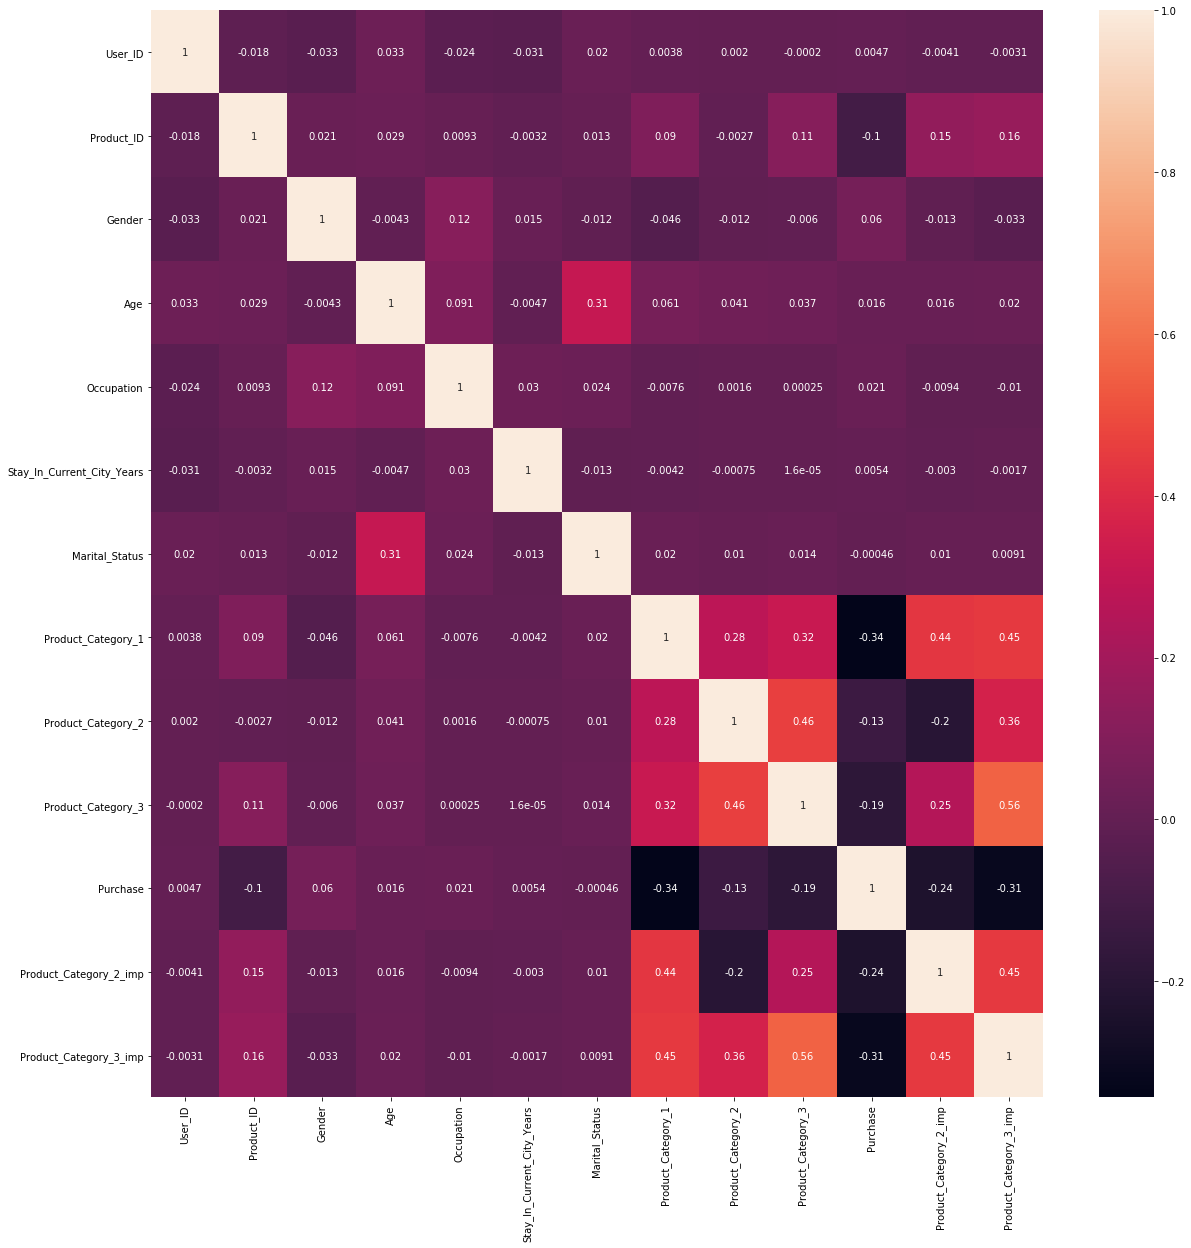

In [59]:
# For better size heatmap is plotted larger
corrmat = bf_train.corr(method = "spearman")
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(bf_train[top_corr_features].corr(),annot=True)

In [60]:
X = bf_train.drop(['Purchase'], axis=1)
y =bf_train[['Purchase']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [61]:
xgb_reg = XGBRegressor(learning_rate=0.6, max_depth=8, min_child_weight=40, seed=0)

xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_pred, y_test))

print (xgb_reg)

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields City_Category